# Data Checking

In [1]:
# House price prediction

In [2]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score




from scipy.stats import norm


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\sonim\OneDrive\Desktop\Advaned regression assignment\train.csv")

In [4]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking the null values in each columns
100*(df.isnull().sum()/df.shape[0])

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
! pip install missingno

In [9]:
import missingno as mno

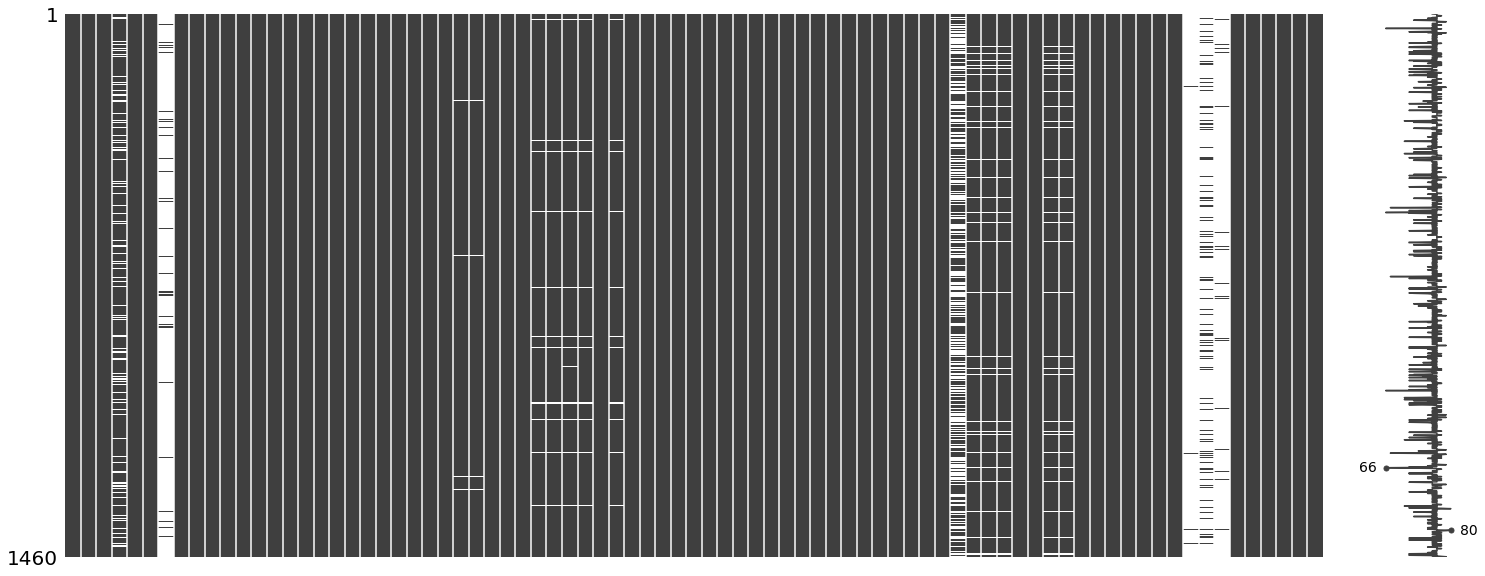

In [10]:
# Having the visual representation of missing values in the data
mno.matrix(df);

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

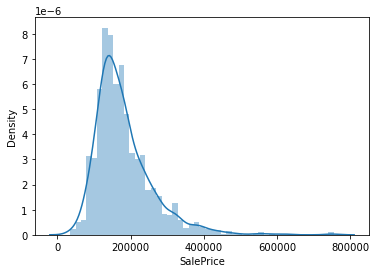

In [11]:
# Checking the distribution of dependent variables
sns.distplot(df['SalePrice'])

In [12]:
# Knowing the skewness of that dependent variable

df.SalePrice.skew()

1.8828757597682129

As per the obtained value of skewness, we can conclude that data in this column is moderrately skewed

# Data Cleaning and Preparation

**Checking all the missing values and treating them accordingly**

In [13]:
100*(df.isnull().sum()/df.shape[0])

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

**LotFrontage**

In [14]:


df.LotFrontage.median()

69.0

In [15]:
# As it is numerical column, so we can replace null values with median

df.LotFrontage.fillna(69.0,inplace=True)

**Alley**

In [16]:
# Here NA stands for there's no alley access so we can say that it is better to replace those nan values rather tahn dropping at first glance

df.Alley.fillna('No Alley access',inplace=True)

**MasVnrType**

In [17]:


df.MasVnrType.value_counts(dropna=False,normalize=True)


None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
NaN        0.005479
Name: MasVnrType, dtype: float64

In [18]:
# We are replacing null values with 'none' as it the mode of that variable and we can't put any assumption on it without knowing.

df.MasVnrType.fillna('None',inplace=True)

**MasVnrArea**


In [19]:
#As this is numerical variable we can impute the null values with median

df.MasVnrArea.median()



0.0

In [20]:
df.MasVnrArea.fillna(0.0,inplace=True)

### Treating the missing values of basement columns

In [21]:
A=['BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']
for i in A:
    print('-----------------------------------------------------------------------------')
    print(df[i].value_counts(normalize=True,dropna=False))
    

-----------------------------------------------------------------------------
TA     0.444521
Gd     0.423288
Ex     0.082877
NaN    0.025342
Fa     0.023973
Name: BsmtQual, dtype: float64
-----------------------------------------------------------------------------
TA     0.897945
Gd     0.044521
Fa     0.030822
NaN    0.025342
Po     0.001370
Name: BsmtCond, dtype: float64
-----------------------------------------------------------------------------
No     0.652740
Av     0.151370
Gd     0.091781
Mn     0.078082
NaN    0.026027
Name: BsmtExposure, dtype: float64
-----------------------------------------------------------------------------
Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
NaN    0.025342
Name: BsmtFinType1, dtype: float64
-----------------------------------------------------------------------------
Unf    0.860274
Rec    0.036986
LwQ    0.031507
NaN    0.026027
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinT

As all the NaN values mentioned in each of these columns are sign of 'No Basement' so we'll replace null values with it.

In [22]:
df.BsmtQual.fillna('No Basement',inplace=True)

df.BsmtCond.fillna('No Basement',inplace=True)

df.BsmtExposure.fillna('No Basement',inplace=True)

df.BsmtFinType1.fillna('No Basement',inplace=True)

df.BsmtFinType2.fillna('No Basement',inplace=True)

**Electrical**

In [23]:
df.Electrical.value_counts(normalize=True,dropna=False)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
NaN      0.000685
Mix      0.000685
Name: Electrical, dtype: float64

In [24]:
# Here its good to impute the null values with 'Mix' as its mixture of all the systems and it could be good option as we can't claim any system to be of any one particular type blindly

df.Electrical.fillna('Mix',inplace=True)

**FireplaceQu**

In [25]:
df.FireplaceQu.value_counts(normalize=True,dropna=False)

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

In [26]:
df.FireplaceQu.fillna('No Fireplace',inplace=True)

### Treating all the Garage values

In [27]:
B=['GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond']

for i in B:
    print('-----------------------------------------------------------------------------')
    print(df[i].value_counts(normalize=True,dropna=False))
    

-----------------------------------------------------------------------------
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
NaN        0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64
-----------------------------------------------------------------------------
NaN       0.055479
2005.0    0.044521
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
2007.0    0.033562
1977.0    0.023973
1998.0    0.021233
1999.0    0.020548
1976.0    0.019863
2008.0    0.019863
2000.0    0.018493
2002.0    0.017808
1968.0    0.017808
1950.0    0.016438
1993.0    0.015068
1958.0    0.014384
2009.0    0.014384
1962.0    0.014384
1965.0    0.014384
1966.0    0.014384
1970.0    0.013699
2001.0    0.013699
1957.0    0.013699
1996.0    0.013699
1978.0    0.013014
1954.0    0.013014
1960.0    0.013014
1997.0    0.013014
1995.0    0.012329
1964.0    0.012329
1974.0    0.012329
1994.0    0.012329
1959.0    0.011644
1963.0    0.010959
1990.0

In [28]:
# Here also NaN doesn't represents missing value but it means no Garage present so  we'll treat NaN values accordingly

df.GarageType.fillna('No Garage',inplace=True)

df.GarageFinish.fillna('No Garage',inplace=True)

df.GarageQual.fillna('No Garage',inplace=True)

df.GarageCond.fillna('No Garage',inplace=True)

In [29]:
# Here there was no mention of NaN stands for 'No Garage' but missing values within it is same as other Garage based values so we can consider it to be related to it.
# So we can impute these NaN values with 'No Garage'

df.GarageYrBlt.fillna(0,inplace=True)

**PoolQC**

In [30]:
# Similar to other columns here also NaN represents 'No Pool'

df.PoolQC.fillna('No Pool',inplace=True)


**Fence**

In [31]:
# Similar to other columns here also NaN represents 'No Fence'


df.Fence.fillna('No Fence',inplace=True)


**MiscFeature**

In [32]:
# Similar to other columns here also NaN represents 'None'


df.MiscFeature.fillna('None',inplace=True)


In [33]:
100*(df.isnull().sum()/df.shape[0])

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

In [34]:
#Let's check the columns with unique values and drop the one with unique value

for i in df.columns:
    print(sum(df.duplicated(subset = i)) == 0)


True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [35]:
df.drop('Id',axis=1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [37]:
#Transforming YearBuilt column to Total_Years_Since_Built

df['Total_Years_Since_Built']=df.YearBuilt.apply(lambda x: 2021-x)
df['Total_Years_Since_Built']

0        18
1        45
2        20
3       106
4        21
5        28
6        17
7        48
8        90
9        82
10       56
11       16
12       59
13       15
14       61
15       92
16       51
17       54
18       17
19       63
20       16
21       91
22       19
23       45
24       53
25       14
26       70
27       14
28       64
29       94
30      101
31       55
32       14
33       62
34       16
35       17
36       27
37       67
38       68
39       66
40       56
41       62
42       38
43       46
44       62
45       16
46       18
47       15
48      101
49       55
50       24
51       87
52       58
53       40
54       66
55       57
56       22
57       17
58       15
59       49
60       17
61      101
62       15
63      100
64       24
65       17
66       51
67       18
68       76
69       68
70       48
71       39
72       23
73       67
74      106
75       48
76       65
77       73
78       53
79      111
80       53
81       23
82       14
83  

In [38]:
#Transforming 'YearRemodAdd' column to 'Remodelled_Total_Years_Since_Built

df['Remodelled_Total_Years_Since_Built']=df.YearRemodAdd.apply(lambda x: 2021-x)
df['Remodelled_Total_Years_Since_Built']

0       18
1       45
2       19
3       51
4       21
5       26
6       16
7       48
8       71
9       71
10      56
11      15
12      59
13      14
14      61
15      20
16      51
17      54
18      17
19      56
20      15
21      71
22      19
23      45
24      20
25      14
26      21
27      13
28      24
29      71
30      71
31      15
32      14
33      62
34      16
35      16
36      26
37      31
38      14
39      66
40      56
41      62
42      38
43      41
44      62
45      16
46      18
47      15
48      13
49      55
50      24
51      71
52      58
53      34
54      66
55      57
56      21
57      17
58      15
59      49
60      17
61      25
62      15
63      71
64      23
65      16
66      32
67      18
68      71
69      68
70      48
71      15
72      23
73      18
74      71
75      48
76      65
77      20
78      53
79      40
80      53
81      23
82      14
83      61
84      25
85      29
86      16
87      12
88      39
89      26
90      71

In [39]:
#Converting GarageYrBlt to its total age from the year it was built.

df['Total_Years_Since_Garage_Built']=df.GarageYrBlt.apply(lambda x: 2021-x)
df['Total_Years_Since_Garage_Built']

0         18.0
1         45.0
2         20.0
3         23.0
4         21.0
5         28.0
6         17.0
7         48.0
8         90.0
9         82.0
10        56.0
11        16.0
12        59.0
13        15.0
14        61.0
15        30.0
16        51.0
17        54.0
18        17.0
19        63.0
20        16.0
21        91.0
22        19.0
23        45.0
24        53.0
25        14.0
26        16.0
27        13.0
28        64.0
29       101.0
30       101.0
31        55.0
32        14.0
33        62.0
34        16.0
35        17.0
36        26.0
37        67.0
38        68.0
39      2021.0
40        56.0
41        62.0
42        38.0
43        44.0
44        62.0
45        16.0
46        18.0
47        15.0
48      2021.0
49        55.0
50        24.0
51        36.0
52        58.0
53        40.0
54        59.0
55        57.0
56        22.0
57        17.0
58        15.0
59        48.0
60        15.0
61        86.0
62        15.0
63        31.0
64        23.0
65        17.0
66        

In [40]:
#Transforming 'YrSold' column from date to  number of years

df['YrSold']=df.YrSold.apply(lambda x: 2021-x)
df['YrSold']

0       13
1       14
2       13
3       15
4       13
5       12
6       14
7       12
8       13
9       13
10      13
11      15
12      13
13      14
14      13
15      14
16      11
17      15
18      13
19      12
20      15
21      14
22      13
23      14
24      11
25      12
26      11
27      11
28      15
29      13
30      13
31      13
32      13
33      11
34      14
35      15
36      12
37      12
38      11
39      13
40      15
41      14
42      14
43      13
44      15
45      11
46      12
47      14
48      12
49      14
50      14
51      15
52      11
53      15
54      14
55      13
56      12
57      15
58      15
59      13
60      15
61      14
62      14
63      11
64      12
65      14
66      11
67      14
68      11
69      15
70      14
71      14
72      12
73      11
74      11
75      12
76      13
77      13
78      11
79      12
80      12
81      15
82      13
83      14
84      12
85      15
86      12
87      12
88      12
89      14
90      15

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MSSubClass                          1460 non-null   int64  
 1   MSZoning                            1460 non-null   object 
 2   LotFrontage                         1460 non-null   float64
 3   LotArea                             1460 non-null   int64  
 4   Street                              1460 non-null   object 
 5   Alley                               1460 non-null   object 
 6   LotShape                            1460 non-null   object 
 7   LandContour                         1460 non-null   object 
 8   Utilities                           1460 non-null   object 
 9   LotConfig                           1460 non-null   object 
 10  LandSlope                           1460 non-null   object 
 11  Neighborhood                        1460 no

In [42]:
# Dropping all the columns which which we transformed to another column

df.drop(['GarageYrBlt','YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [43]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

In [44]:
cat_cols=df.columns.drop(['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','MiscVal','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea','Total_Years_Since_Built', 'Remodelled_Total_Years_Since_Built',
       'Total_Years_Since_Garage_Built','SalePrice','MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'MoSold', 'YrSold'])
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtHalfBath',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

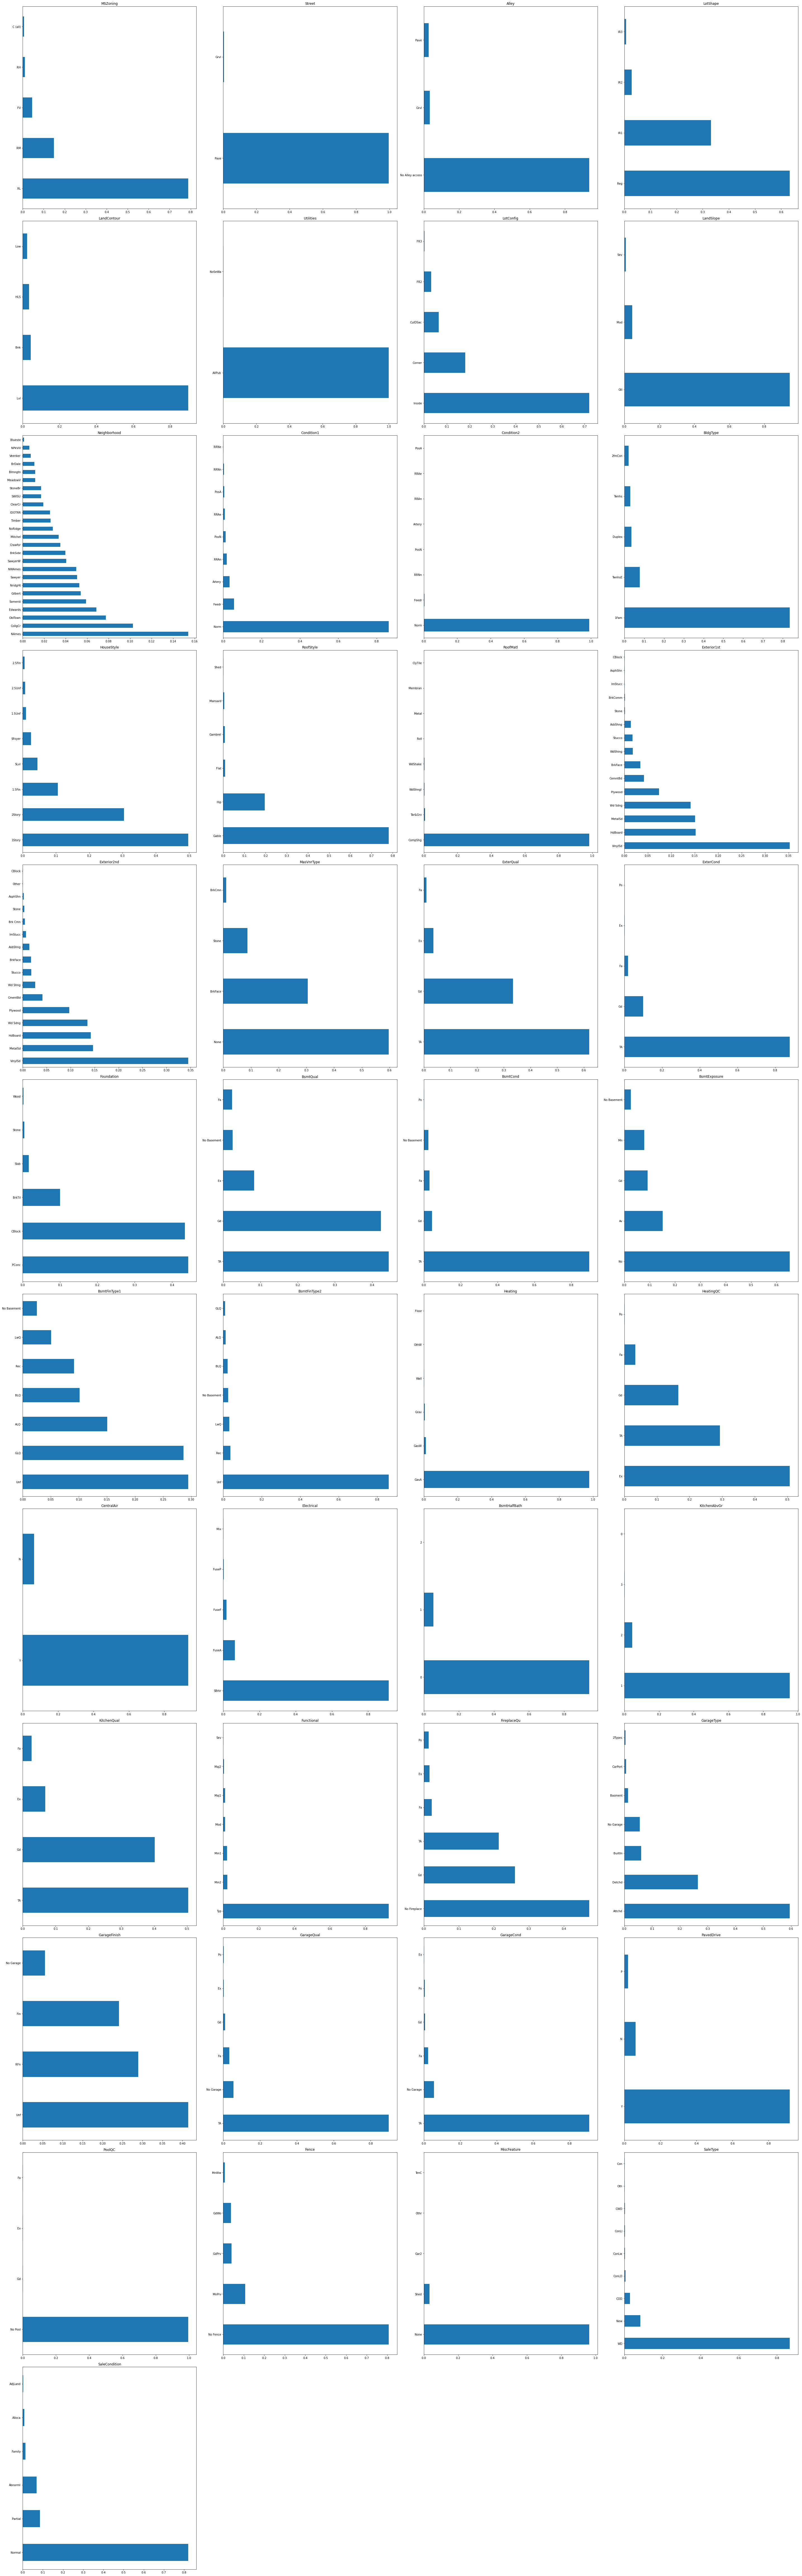

In [45]:
plt.figure(figsize=[40,160])
for ind, col in enumerate(cat_cols):
    plt.subplot(15,4,ind+1)
    df[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.tight_layout()

**Checking the skewness of categorical colums by looking into the plots and individual columns as well**

In [46]:
for i in cat_cols:
    print('----------------------------------------------------------------------------------')
    print(df[i].value_counts(normalize=True,dropna=False))

----------------------------------------------------------------------------------
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
----------------------------------------------------------------------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
----------------------------------------------------------------------------------
No Alley access    0.937671
Grvl               0.034247
Pave               0.028082
Name: Alley, dtype: float64
----------------------------------------------------------------------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
----------------------------------------------------------------------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
----------------------------------------------------------------------------------
AllPu

In [47]:
# Dropping the appropriate columns which are heavily skewed

df.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature'],axis=1,inplace=True)

**Checking numeric columns in terms of their outliers and skewness**

In [48]:
num_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','MiscVal','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea','Total_Years_Since_Built', 'Remodelled_Total_Years_Since_Built',
       'Total_Years_Since_Garage_Built','SalePrice','MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'MoSold', 'YrSold']
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'MiscVal',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Total_Years_Since_Built',
 'Remodelled_Total_Years_Since_Built',
 'Total_Years_Since_Garage_Built',
 'SalePrice',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

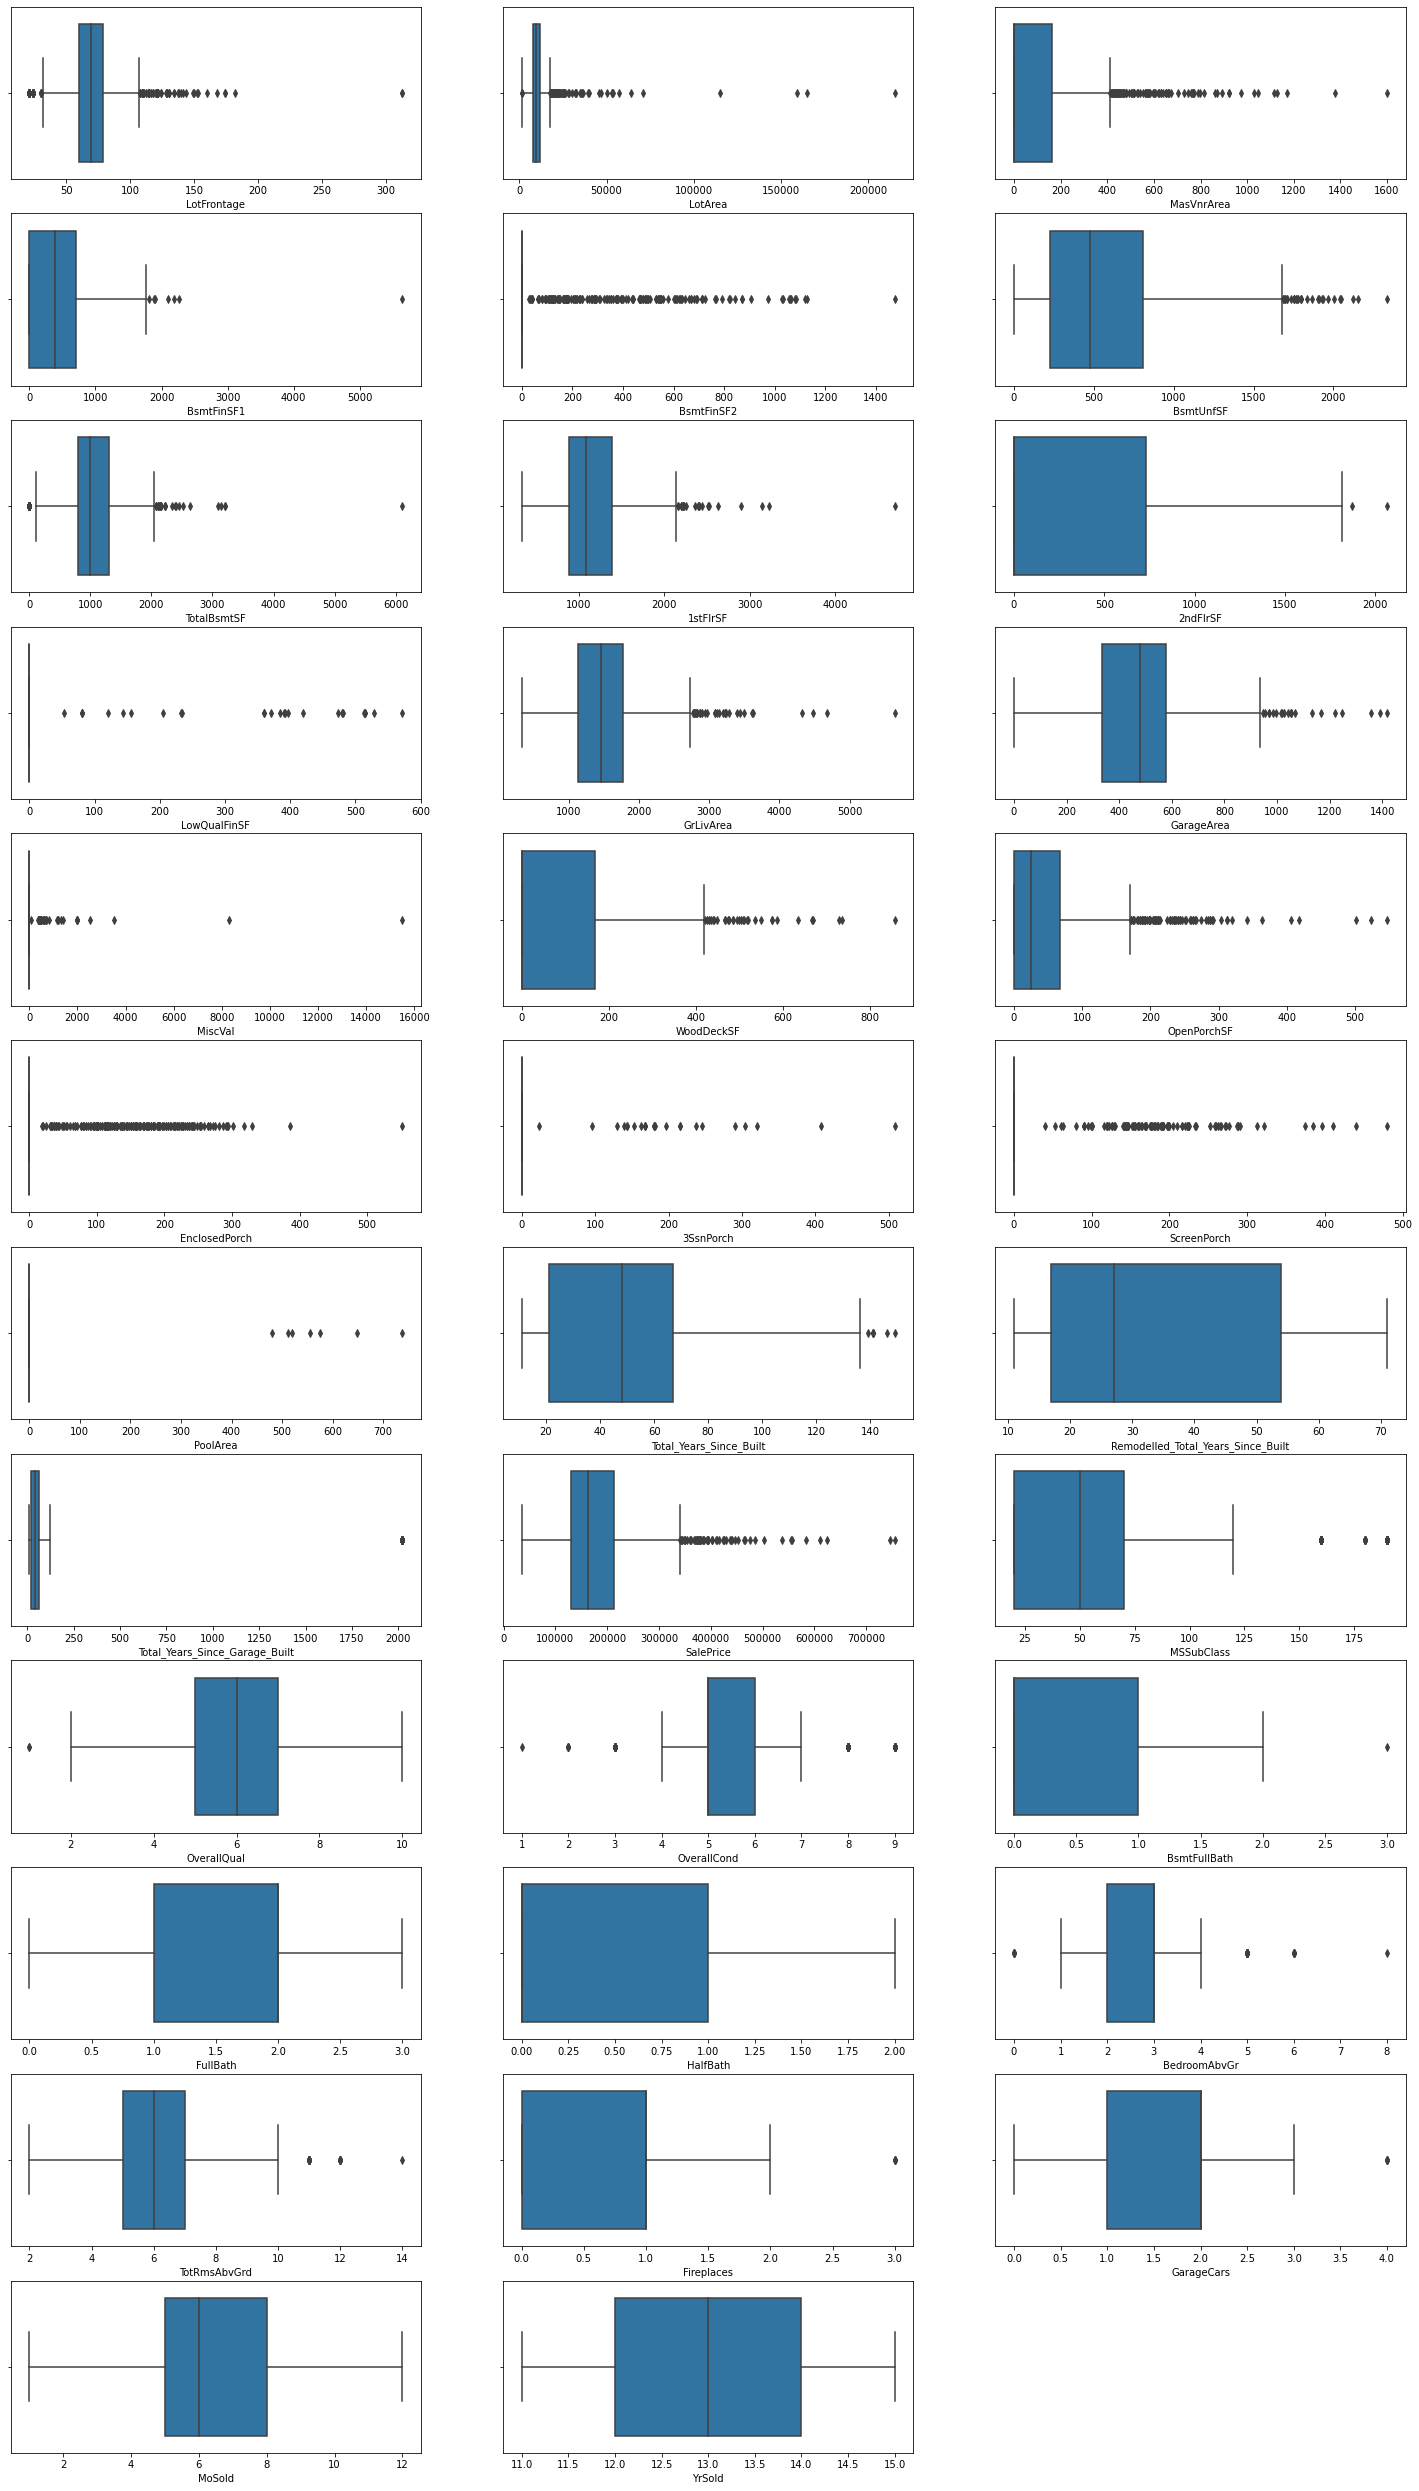

In [49]:
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
    plt.subplot(12,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

**Checking the Skewness of numeric columns**

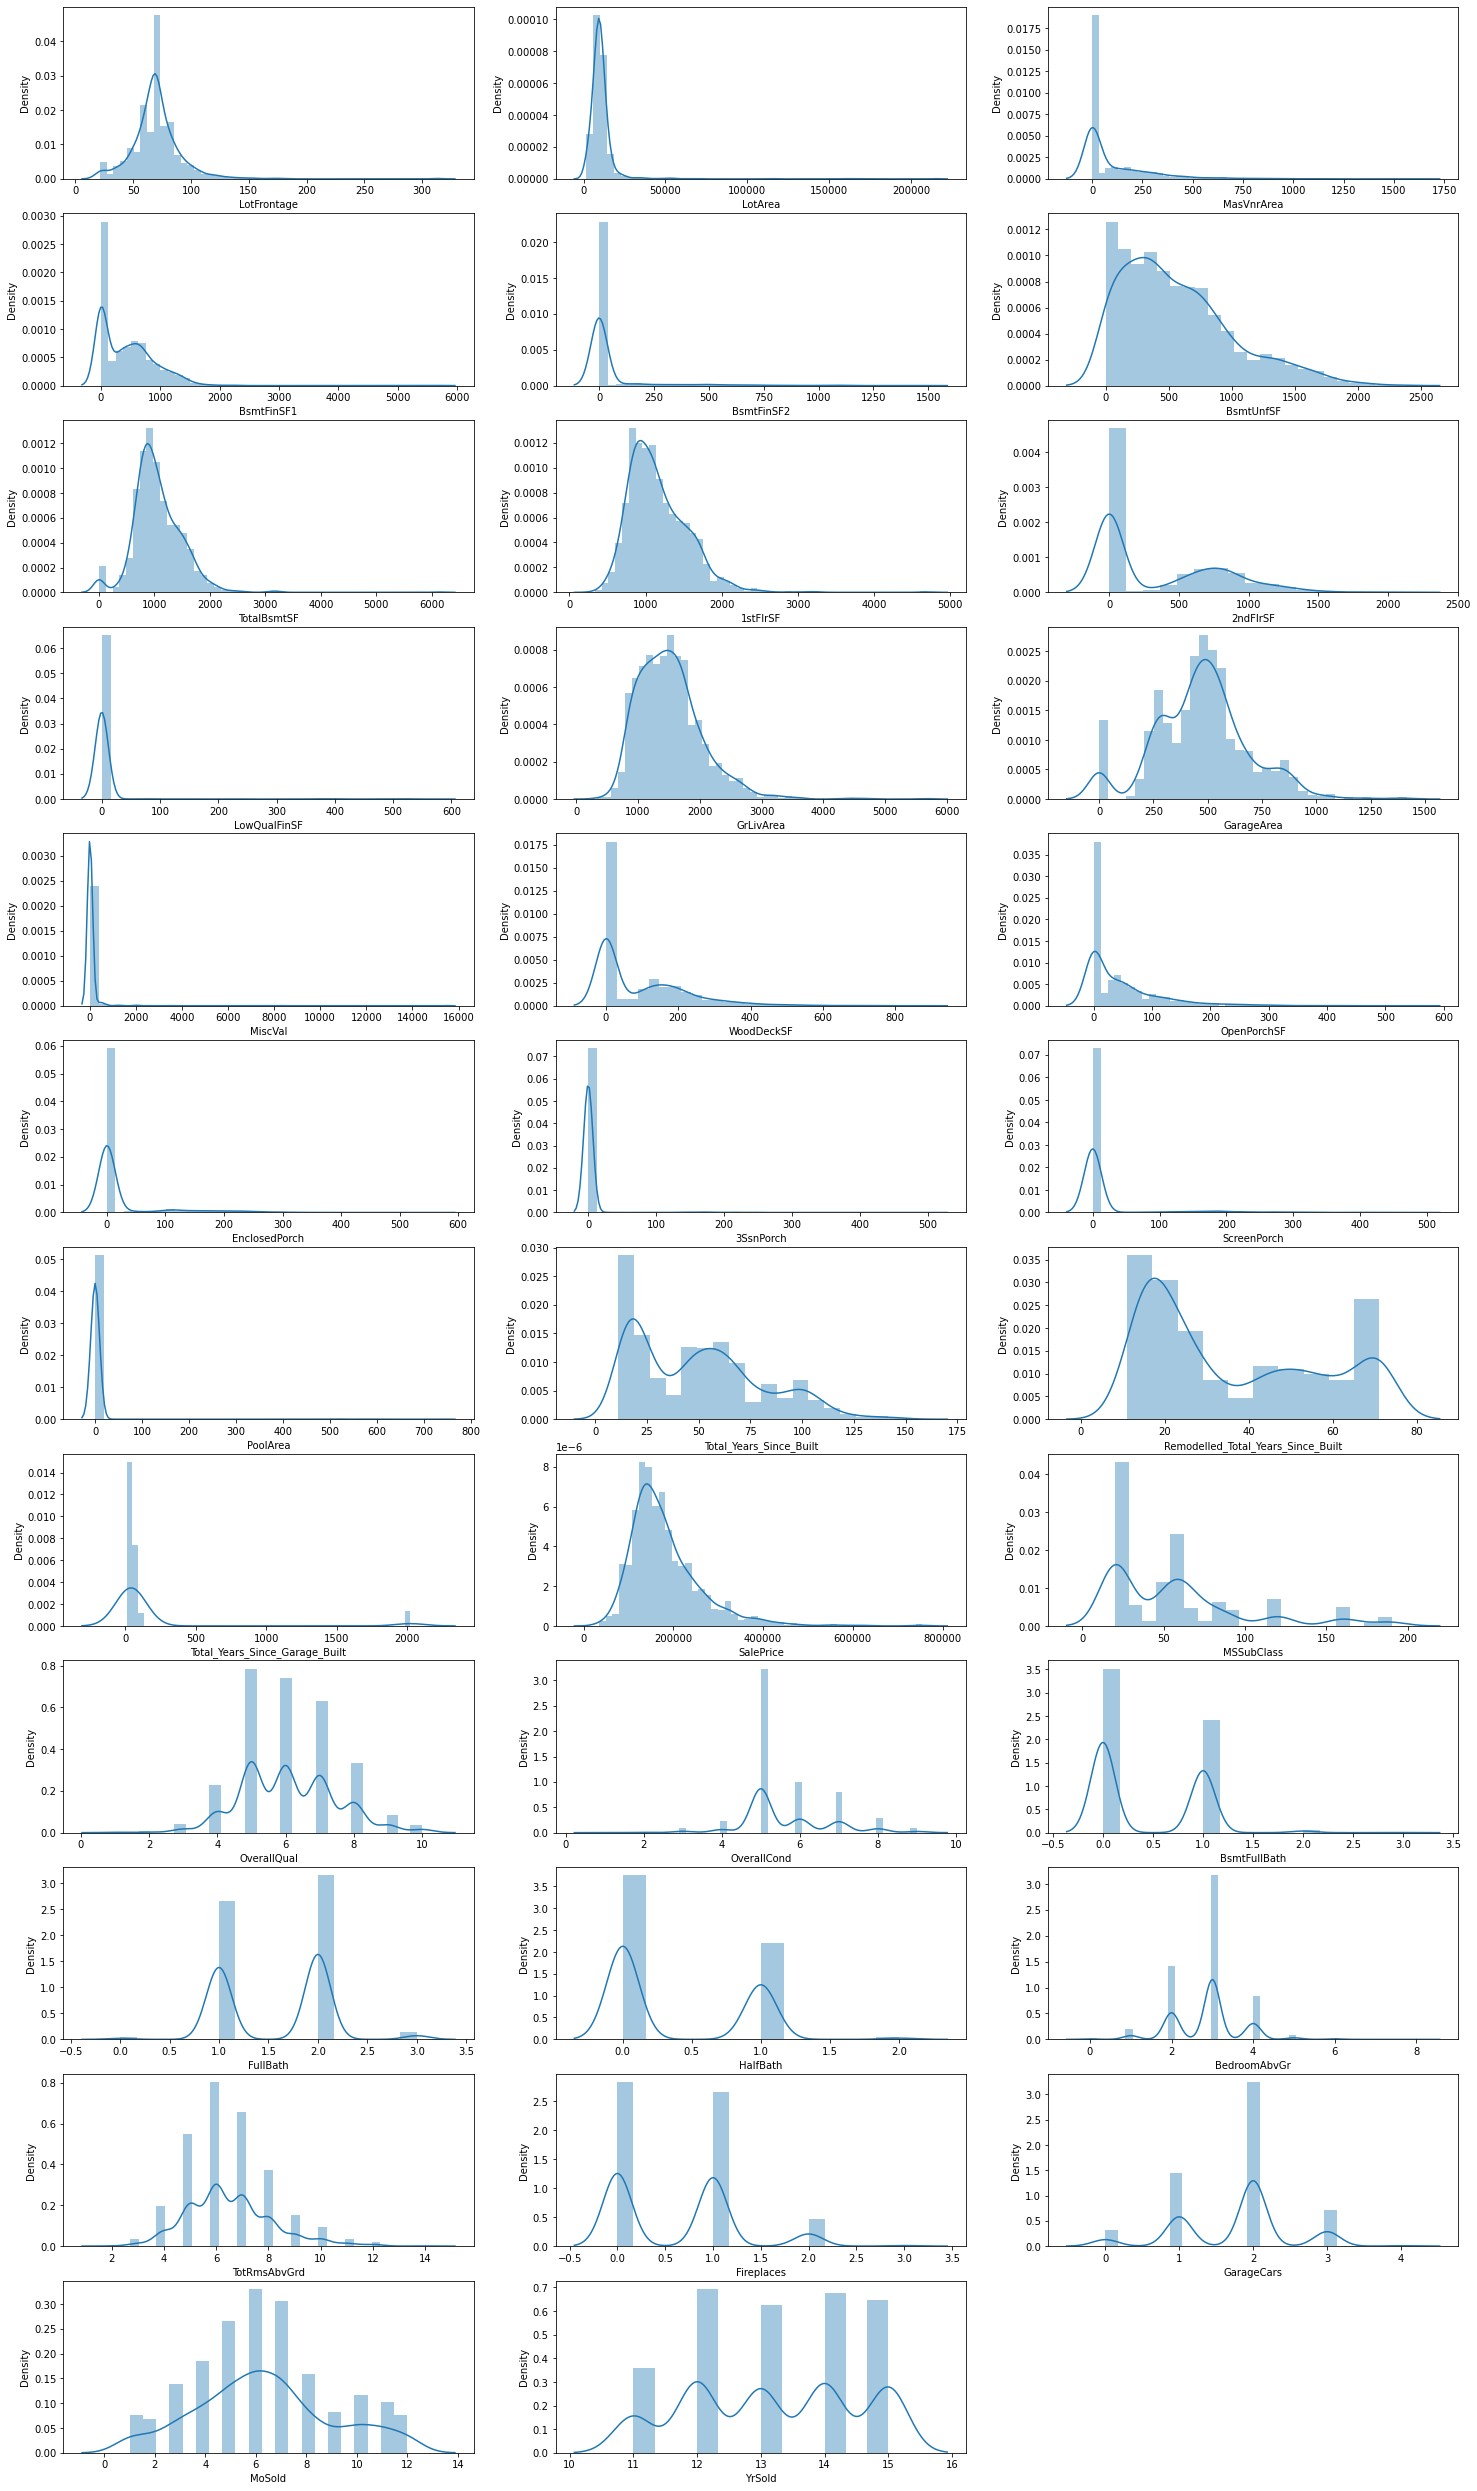

In [50]:
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
    plt.subplot(12,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xlabel(i[1])

In [51]:
df[num_cols].skew()

LotFrontage                            2.409147
LotArea                               12.207688
MasVnrArea                             2.677616
BsmtFinSF1                             1.685503
BsmtFinSF2                             4.255261
BsmtUnfSF                              0.920268
TotalBsmtSF                            1.524255
1stFlrSF                               1.376757
2ndFlrSF                               0.813030
LowQualFinSF                           9.011341
GrLivArea                              1.366560
GarageArea                             0.179981
MiscVal                               24.476794
WoodDeckSF                             1.541376
OpenPorchSF                            2.364342
EnclosedPorch                          3.089872
3SsnPorch                             10.304342
ScreenPorch                            4.122214
PoolArea                              14.828374
Total_Years_Since_Built                0.613461
Remodelled_Total_Years_Since_Built     0

**Rectifying the skewness of numeric columns**

In [52]:
df[num_cols] = np.log(df[num_cols]+1)

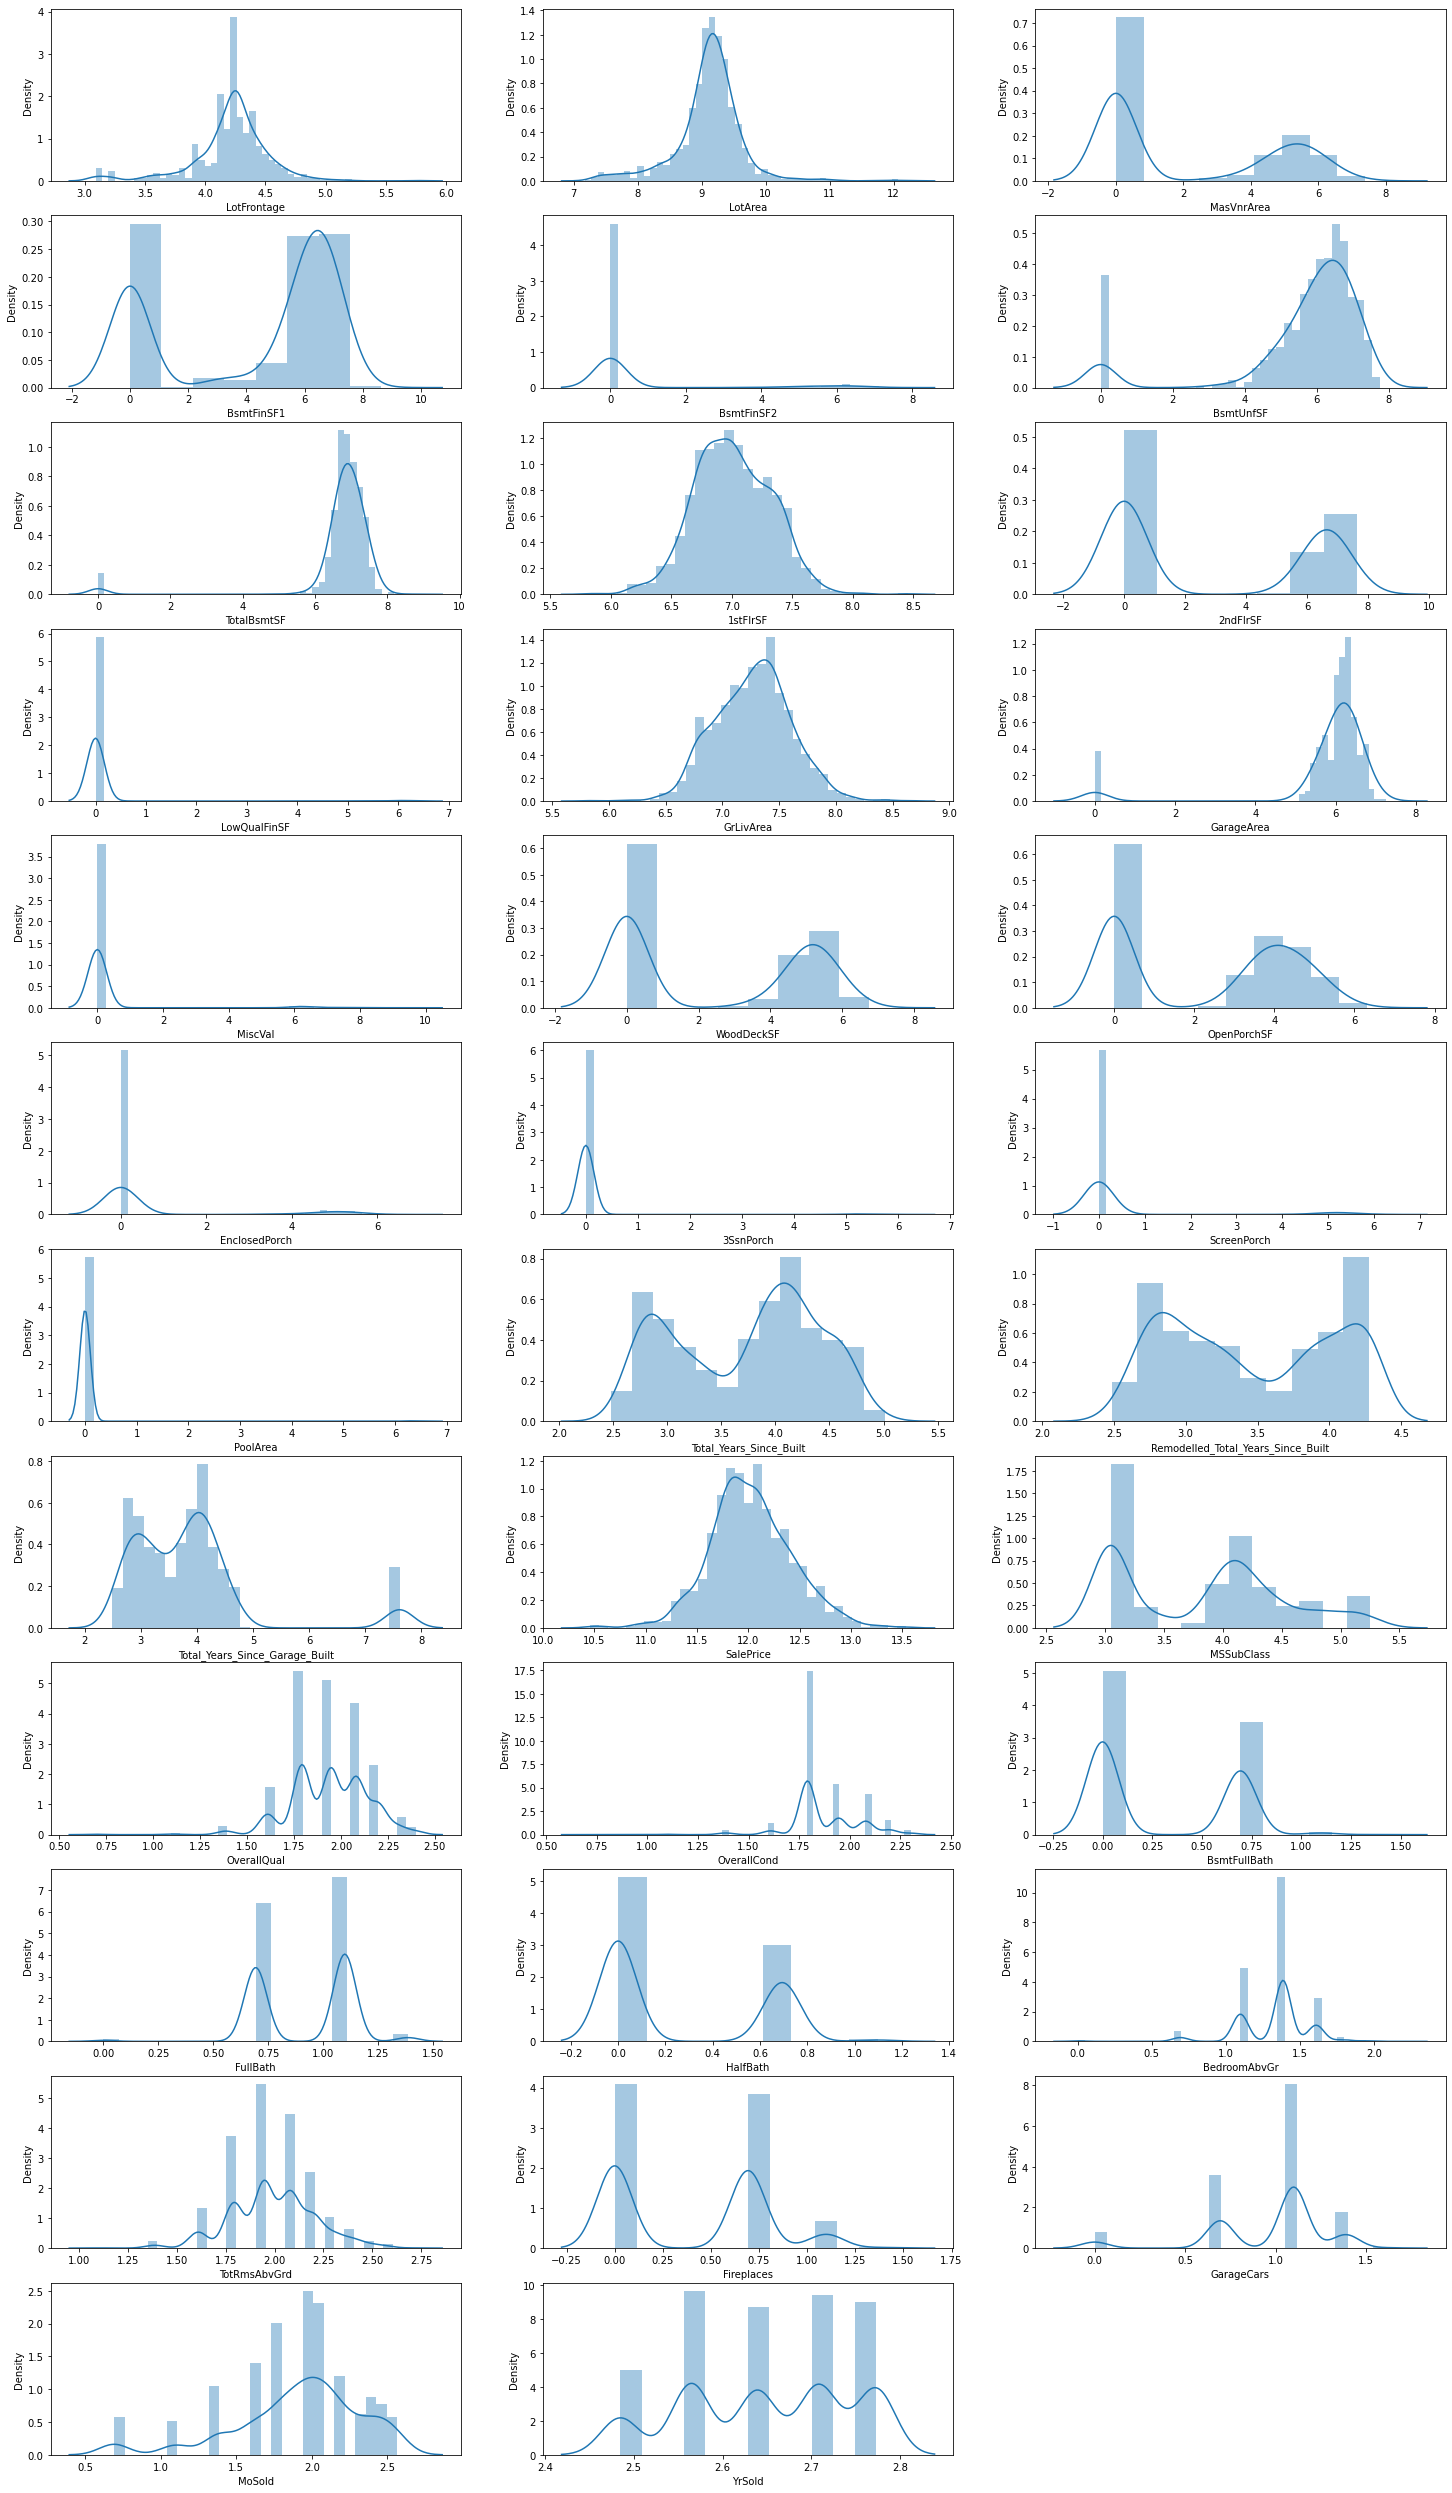

In [53]:
# Rechecking the skewness of each numeric column by plotting

plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
    plt.subplot(12,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xlabel(i[1])

In [54]:
# Rechecking the skewness of each numeric column

df[num_cols].skew()

LotFrontage                           -0.870006
LotArea                               -0.137404
MasVnrArea                             0.503532
BsmtFinSF1                            -0.618410
BsmtFinSF2                             2.523694
BsmtUnfSF                             -2.186504
TotalBsmtSF                           -5.154670
1stFlrSF                               0.080114
2ndFlrSF                               0.289643
LowQualFinSF                           7.460317
GrLivArea                             -0.006140
GarageArea                            -3.482604
MiscVal                                5.170704
WoodDeckSF                             0.153537
OpenPorchSF                           -0.023397
EnclosedPorch                          2.112275
3SsnPorch                              7.734975
ScreenPorch                            3.150409
PoolArea                              14.363102
Total_Years_Since_Built               -0.200360
Remodelled_Total_Years_Since_Built     0

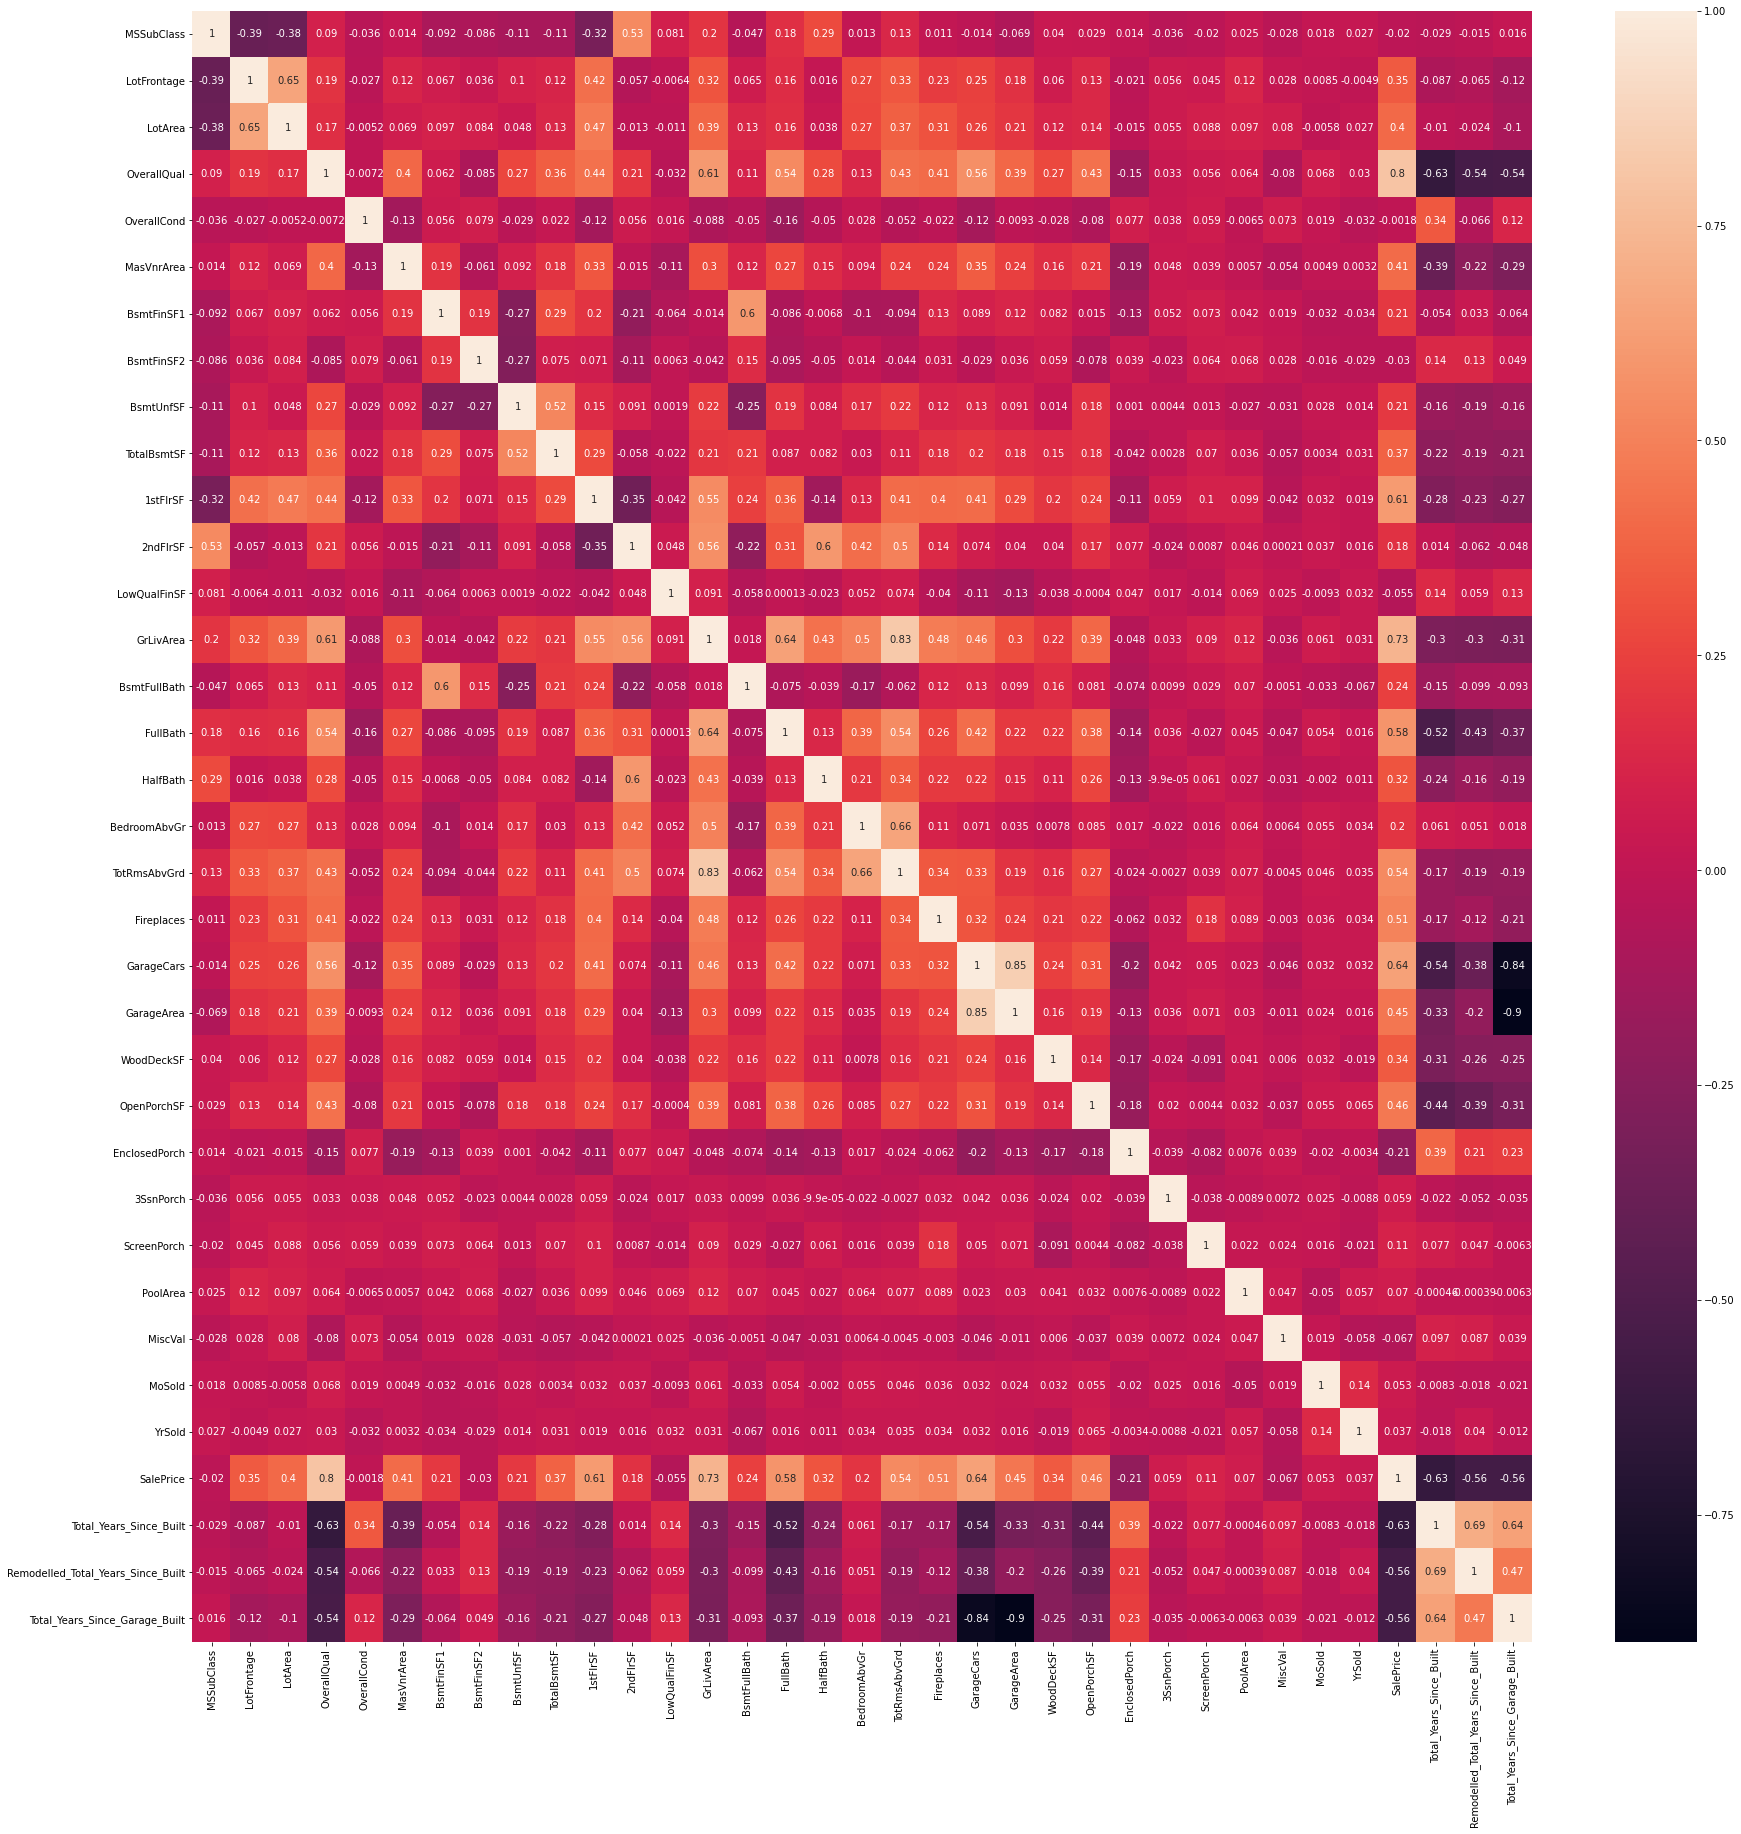

In [55]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Dummification of Categorical Columns

In [56]:
# Updating the cat_cols  columns which we removed as per their skewness

cat_cols=cat_cols.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature'])
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [57]:

cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [58]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LotConfig      1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   HouseStyle     1460 non-null   object
 5   RoofStyle      1460 non-null   object
 6   Exterior1st    1460 non-null   object
 7   Exterior2nd    1460 non-null   object
 8   MasVnrType     1460 non-null   object
 9   ExterQual      1460 non-null   object
 10  ExterCond      1460 non-null   object
 11  Foundation     1460 non-null   object
 12  BsmtQual       1460 non-null   object
 13  BsmtExposure   1460 non-null   object
 14  BsmtFinType1   1460 non-null   object
 15  HeatingQC      1460 non-null   object
 16  KitchenQual    1460 non-null   object
 17  FireplaceQu    1460 non-null   object
 18  GarageType     1460 non-null

In [59]:
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)



In [60]:
df_dummies.head()


MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0   

In [61]:
df.drop(cat_cols,axis=1,inplace=True)



In [62]:
df = pd.concat([df, df_dummies],axis=1)
df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    4.110874     4.189655  9.042040     2.079442     1.791759    5.283204   
1    3.044522     4.394449  9.169623     1.945910     2.197225    0.000000   
2    4.110874     4.234107  9.328212     2.079442     1.791759    5.093750   
3    4.262680     4.110874  9.164401     2.079442     1.791759    0.000000   
4    4.110874     4.442651  9.565284     2.197225     1.791759    5.860786   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0    6.561031         0.0   5.017280     6.753438  6.753438  6.751101   
1    6.886532         0.0   5.652489     7.141245  7.141245  0.000000   
2    6.188264         0.0   6.075346     6.825460  6.825460  6.765039   
3    5.379897         0.0   6.293419     6.629363  6.869014  6.629363   
4    6.486161         0.0   6.196444     7.044033  7.044033  6.960348   

   LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0           0.0   7.444833      0.693147  1.098612  0.693147      1.386294   
1           0.0   7.141245      0.000000  1.098612  0.000000      1.386294   
2           0.0   7.488294      0.693147  1.098612  0.693147      1.386294   
3           0.0   7.448916      0.693147  0.693147  0.000000      1.386294   
4           0.0   7.695758      0.693147  1.098612  0.693147      1.609438   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0      2.197225    0.000000    1.098612    6.308098    0.000000     4.127134   
1      1.945910    0.693147    1.098612    6.133398    5.700444     0.000000   
2      1.945910    0.693147    1.098612    6.411818    0.000000     3.761200   
3      2.079442    0.693147    1.386294    6.466145    0.000000     3.583519   
4      2.302585    0.693147    1.386294    6.729824    5.262690     4.442651   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
0       0.000000        0.0          0.0       0.0      0.0  1.098612   
1       0.000000        0.0          0.0       0.0      0.0  1.791759   
2       0.000000        0.0          0.0       0.0      0.0  2.302585   
3       5.609472        0.0          0.0       0.0      0.0  1.098612   
4       0.000000        0.0          0.0       0.0      0.0  2.564949   

     YrSold  SalePrice  Total_Years_Since_Built  \
0  2.639057  12.247699                 2.944439   
1  2.708050  12.109016                 3.828641   
2  2.639057  12.317171                 3.044522   
3  2.772589  11.849405                 4.672829   
4  2.639057  12.429220                 3.091042   

   Remodelled_Total_Years_Since_Built  Total_Years_Since_Garage_Built  \
0                            2.944439                        2.944439   
1                            3.828641                        3.828641   
2                            2.995732                        3.044522   
3                            3.951244                        3.178054   
4                            3.091042                        3.091042   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1               

In [63]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 178 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    MSSubClass                          float64
 1    LotFrontage                         float64
 2    LotArea                             float64
 3    OverallQual                         float64
 4    OverallCond                         float64
 5    MasVnrArea                          float64
 6    BsmtFinSF1                          float64
 7    BsmtFinSF2                          float64
 8    BsmtUnfSF                           float64
 9    TotalBsmtSF                         float64
 10   1stFlrSF                            float64
 11   2ndFlrSF                            float64
 12   LowQualFinSF                        float64
 13   GrLivArea                           float64
 14   BsmtFullBath                        float64
 15   FullBath                            

In [64]:
df.shape

(1460, 178)

### Train-Test Split

In [65]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
df_train.shape

(1021, 178)

In [67]:
df_test.shape

(438, 178)

In [68]:
X_train=df_train.drop('SalePrice',axis=1)
y_train=df_train['SalePrice']


In [69]:
X_test=df_test.drop('SalePrice',axis=1)
y_test=df_test['SalePrice']

In [70]:
y_train.head()

210     11.492733
318     12.468441
239     11.635152
986     11.669938
1416    11.715874
Name: SalePrice, dtype: float64

In [71]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210     3.433987     4.219508  8.631414     1.791759     1.945910    0.000000   
318     4.110874     4.510860  9.200391     2.079442     1.791759    5.549076   
239     3.931826     3.970292  9.075894     1.945910     1.609438    0.000000   
986     3.931826     4.094345  8.577535     1.945910     2.197225    0.000000   
1416    5.252273     4.110874  9.336180     1.609438     1.945910    0.000000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210     6.150603         0.0   5.983936     6.762730  6.762730  0.000000   
318     6.895683         0.0   5.888878     7.206377  7.224753  7.150701   
239     4.553877         0.0   6.464588     6.601230  6.683361  6.536692   
986     0.000000         0.0   6.186209     6.186209  6.909753  6.453625   
1416    0.000000         0.0   6.656727     6.656727  7.128496  6.951772   

      LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
210            0.0   6.762730      0.693147  0.693147  0.000000      1.098612   
318            0.0   7.881182      0.693147  1.098612  0.693147      1.609438   
239            0.0   7.305188      0.000000  0.693147  0.693147      1.386294   
986            0.0   7.400010      0.000000  0.693147  0.000000      1.098612   
1416           0.0   7.736744      0.000000  1.098612  0.000000      1.609438   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
210       1.791759    0.000000    0.000000    0.000000    0.000000   
318       2.302585    0.693147    1.386294    6.487684    5.831882   
239       2.079442    0.693147    0.693147    5.398163    0.000000   
986       1.791759    0.000000    0.693147    5.545177    5.978886   
1416      2.484907    0.000000    1.098612    6.329721    0.000000   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
210      0.000000       4.574711        0.0          0.0       0.0      0.0   
318      4.110874       4.976734        0.0          0.0       0.0      0.0   
239      4.948760       0.000000        0.0          0.0       0.0      0.0   
986      0.000000       0.000000        0.0          0.0       0.0      0.0   
1416     0.000000       4.744932        0.0          0.0       0.0      0.0   

        MoSold    YrSold  Total_Years_Since_Built  \
210   1.609438  2.639057                 4.574711   
318   1.609438  2.564949                 3.367296   
239   1.609438  2.484907                 4.343805   
986   1.945910  2.772589                 4.718499   
1416  1.609438  2.484907                 4.919981   

      Remodelled_Total_Years_Since_Built  Total_Years_Since_Garage_Built  \
210                             4.276666                        7.611842   
318                             3.367296                        3.367296   
239                             4.276666                        4.290459   
986                             2.944439                        4.276666   
1416                            4.276666                        3.931826   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
210             0            0            1            0             0   
318             0            0            1            0             0   
239             0            0            1            0             0   
986             0            0            0            1             0   
1416            0            0            0            1             0   

      LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
210              0             1                  0              0   
318              0             1                  0              0   
239              0             1                  0              0   
986              0             1                  0              0   
1416             0             1                  0              0   

      LotConfig_FR3  LotConfig_Inside

In [72]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'MiscVal',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Total_Years_Since_Built',
 'Remodelled_Total_Years_Since_Built',
 'Total_Years_Since_Garage_Built',
 'SalePrice',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [73]:
# Updating num_cols by removing 'SalePrice' 

num_cols=df[num_cols].columns.drop('SalePrice')
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'MiscVal', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Total_Years_Since_Built', 'Remodelled_Total_Years_Since_Built',
       'Total_Years_Since_Garage_Built', 'MSSubClass', 'OverallQual',
       'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

In [74]:
#Scaling the numeric variables

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [75]:
X_train.describe()

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -7.973543e-16 -9.435808e-16  4.894333e-15  1.161765e-15  1.756838e-15   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.146409e+00 -3.497229e+00 -3.477900e+00 -6.110936e+00 -7.123259e+00   
25%   -1.146409e+00 -3.055241e-01 -3.657692e-01 -7.209253e-01 -4.779050e-01   
50%    1.290964e-01  1.251812e-01  1.030087e-01  3.536873e-02 -4.779050e-01   
75%    6.047019e-01  5.037193e-01  4.726639e-01  6.905004e-01  4.545312e-01   
max    2.027250e+00  4.822450e+00  6.108151e+00  2.252898e+00  2.612009e+00   

         MasVnrArea    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -2.929423e-16  2.753266e-16 -1.055854e-16 -3.166474e-16  2.832645e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -8.077324e-01 -1.430688e+00 -3.590098e-01 -2.892145e+00 -5.578102e+00   
25%   -8.077324e-01 -1.430688e+00 -3.590098e-01 -1.085500e-01 -4.671465e-02   
50%   -8.077324e-01  5.763334e-01 -3.590098e-01  2.835562e-01  1.385578e-01   
75%    1.121192e+00  7.764613e-01 -3.590098e-01  5.710255e-01  3.712271e-01   
max    2.000042e+00  1.471598e+00  3.529957e+00  1.121184e+00  1.643881e+00   

           1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.900971e-15 -1.267894e-16 -5.915390e-17  4.947615e-18 -5.991507e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -3.377717e+00 -8.661584e-01 -1.401341e-01 -3.583194e+00 -8.534486e-01   
25%   -7.317218e-01 -8.661584e-01 -1.401341e-01 -7.116121e-01 -8.534486e-01   
50%   -6.289697e-02 -8.661584e-01 -1.401341e-01  6.406843e-02 -8.534486e-01   
75%    7.718393e-01  1.139672e+00 -1.401341e-01  6.299722e-01  1.113442e+00   
max    4.470041e+00  1.457141e+00  7.957469e+00  4.136740e+00  3.080333e+00   

           FullBath      HalfBath  BedroomAbvGr  TotRmsAbvGrd    Fireplaces  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.105183e-16 -2.076911e-16  5.526105e-16  7.223518e-16  2.954433e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -4.092557e+00 -7.593425e-01 -5.685489e+00 -2.866226e+00 -9.873820e-01   
25%   -1.002624e+00 -7.593425e-01 -9.694956e-01 -9.499045e-01 -9.873820e-01   
50%    8.048715e-01 -7.593425e-01  2.654321e-01 -2.213529e-01  7.693106e-01   
75%    8.048715e-01  1.277248e+00  2.654321e-01  4.097472e-01  7.693106e-01   
max    2.087310e+00  2.468577e+00  3.746498e+00  3.380696e+00  2.526003e+00   

         GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  EnclosedPorch  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   1.021000e+03   
mean   3.429621e-16  6.817922e-17 -1.216787e-16 -4.849750e-17  -1.061291e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   1.000490e+00   
min   -3.011612e+00 -3.946797e+00 -9.323190e-01 -1.074246e+00  -4.151393e-01   
25%   -8.670808e-01 -2.095880e-03 -9.323190e-01 -1.074246e+00  -4.151393e-01   
50%    3.873892e-01  2.563962e-01 -9.323190e-01  4.382095e-01  -4.151393e-01   
75%    3.873892e-01  3.802454e-01  1.046870e+00  9.045517e-01  -4.151393e-01   
max    1.967835e+00  9.926788e-01  1.673704e+00  1.832429e+00   3.158748e+00   

          3SsnPorch   ScreenPorch      PoolArea       MiscVal        MoSold  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -7.541035e-17 -6.274228e-17 -2.083435e-16 -3.261620e-16  6.903826e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.367043e-01 -2.888674e-01 -6.270479e-02 -1.918023e-01 -2.793206e+00   
25%   -1.367043e-01 -2.888674e-01 -6.270479e-

In [76]:
X_test.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  438.000000   438.000000  438.000000   438.000000   438.000000   
mean    -0.112175     0.059798    0.033826     0.024712    -0.029177   
std      0.960939     0.944010    0.986188     0.969924     1.061483   
min     -1.146409    -3.497229   -3.723381    -6.110936    -4.670657   
25%     -1.146409    -0.305524   -0.288273    -0.720925    -0.477905   
50%      0.129096     0.125181    0.080083     0.035369    -0.477905   
75%      0.386480     0.581964    0.503836     0.690500     0.454531   
max      2.027250     4.822450    5.525279     2.252898     2.612009   

       MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  \
count  438.000000  438.000000  438.000000  438.000000   438.000000   
mean    -0.001109   -0.034002   -0.031462    0.101264     0.046640   
std      1.001565    1.017302    0.944147    0.853662     0.818275   
min     -0.807732   -1.430688   -0.359010   -2.892145    -5.578102   
25%     -0.807732   -1.430688   -0.359010   -0.024047    -0.026106   
50%     -0.807732    0.548264   -0.359010    0.324885     0.133115   
75%      1.157679    0.775389   -0.359010    0.573264     0.328901   
max      1.790045    1.153325    3.387001    1.023785     0.911688   

         1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  \
count  438.000000  438.000000    438.000000  438.000000    438.000000   
mean    -0.031311    0.016293     -0.035456   -0.015130     -0.091144   
std      0.945530    1.007266      0.892664    1.025013      0.972104   
min     -3.710712   -0.866158     -0.140134   -4.400538     -0.853449   
25%     -0.644515   -0.866158     -0.140134   -0.745764     -0.853449   
50%     -0.055778   -0.866158     -0.140134    0.043391     -0.853449   
75%      0.594246    1.145777     -0.140134    0.675764      1.113442   
max      2.549107    1.377435      8.093307    2.785472      2.263999   

         FullBath    HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
count  438.000000  438.000000    438.000000    438.000000  438.000000   
mean    -0.005299    0.041995      0.049224      0.023971    0.085077   
std      0.984778    1.013567      0.955863      1.041282    0.998689   
min     -4.092557   -0.759342     -5.685489     -4.225878   -0.987382   
25%     -1.002624   -0.759342     -0.969496     -0.949905   -0.987382   
50%      0.804871   -0.759342      0.265432     -0.221353    0.769311   
75%      0.804871    1.277248      0.265432      0.409747    0.769311   
max      2.087310    2.468577      2.667685      2.704369    1.796910   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  438.000000  438.000000  438.000000   438.000000     438.000000   
mean    -0.009165    0.019957    0.049905    -0.011341      -0.066144   
std      0.991130    0.968319    1.004799     0.996696       0.922109   
min     -3.011612   -3.946797   -0.932319    -1.074246      -0.415139   
25%     -0.867081    0.014255   -0.932319    -1.074246      -0.415139   
50%      0.387389    0.242819   -0.932319     0.420003      -0.415139   
75%      0.387389    0.380245    1.073336     0.875888      -0.415139   
max      1.277450    0.905830    1.610844     1.853218       2.847406   

        3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold  \
count  438.000000   438.000000  438.000000  438.000000  438.000000   
mean    -0.052272     0.029773    0.048705   -0.007071    0.060374   
std      0.787116     1.055909    1.343446    0.985827    0.940111   
min     -0.136704    -0.288867   -0.062705   -0.191802   -2.793206   
25%     -0.136704    -0.288867   -0.062705   -0.191802   -0.256725   
50%     -0.136704    -0.288867   -0.062705   -0.191802    0.099179   
75%     -0.136704    -0.288867   -0.062705   -0.191802    0.679415   
max      7.633672     4.186601   16.710099    6.161095    1.528419   

           YrSold  Total_Years_Since_Built  \
count  438.000000               438.000000   
mean     0.011051             

In [77]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.586550     0.034461 -0.912617    -0.720925     0.454531   -0.807732   
318     0.386480     0.946287  0.182372     0.690500    -0.477905    1.303917   
239     0.129096    -0.745495 -0.057220     0.035369    -1.580743   -0.807732   
986     0.129096    -0.357255 -1.016306     0.035369     1.974697   -0.807732   
1416    2.027250    -0.305524  0.443696    -1.615431     0.454531   -0.807732   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210     0.635731    -0.35901   0.203984     0.024236 -0.770884 -0.866158   
318     0.886055    -0.35901   0.154800     0.391760  0.660986  1.310236   
239     0.099279    -0.35901   0.452676    -0.109553 -1.016857  1.123355   
986    -1.430688    -0.35901   0.308641    -0.453362 -0.315239  1.098073   
1416   -1.430688    -0.35901   0.552090    -0.063579  0.362672  1.249690   

      LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
210      -0.140134  -1.532855      1.113442 -1.002624 -0.759342     -0.969496   
318      -0.140134   1.848308      1.113442  0.804871  1.277248      1.223316   
239      -0.140134   0.107037     -0.853449 -1.002624  1.277248      0.265432   
986      -0.140134   0.393688     -0.853449 -1.002624 -0.759342     -0.969496   
1416     -0.140134   1.411660     -0.853449  0.804871 -0.759342      1.223316   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
210      -0.949905   -0.987382   -3.011612   -3.946797   -0.932319   
318       1.464375    0.769311    1.277450    0.468613    1.317705   
239       0.409747    0.769311   -0.867081   -0.272897   -0.932319   
986      -0.949905   -0.987382   -0.867081   -0.172841    1.374421   
1416      2.326069   -0.987382    0.387389    0.361106   -0.932319   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
210     -1.074246       2.173709  -0.136704    -0.288867 -0.062705 -0.191802   
318      0.834081       2.401215  -0.136704    -0.288867 -0.062705 -0.191802   
239      1.223040      -0.415139  -0.136704    -0.288867 -0.062705 -0.191802   
986     -1.074246      -0.415139  -0.136704    -0.288867 -0.062705 -0.191802   
1416    -1.074246       2.270037  -0.136704    -0.288867 -0.062705 -0.191802   

        MoSold    YrSold  Total_Years_Since_Built  \
210  -0.677670 -0.086737                 1.285669   
318  -0.677670 -0.863611                -0.543578   
239  -0.677670 -1.702699                 0.935844   
986   0.099179  1.313072                 1.503509   
1416 -0.677670 -1.702699                 1.808757   

      Remodelled_Total_Years_Since_Built  Total_Years_Since_Garage_Built  \
210                             1.442898                        3.447848   
318                            -0.148594                       -0.413479   
239                             1.442898                        0.426337   
986                            -0.888638                        0.413789   
1416                            1.442898                        0.100082   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
210             0            0            1            0             0   
318             0            0            1            0             0   
239             0            0            1            0             0   
986             0            0            0            1             0   
1416            0            0            0            1             0   

      LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
210              0             1                  0              0   
318              0             1                  0              0   
239              0             1                  0              0   
986              0             1                  0              0   
1416             0             1                  0              0   

      LotConfig_FR3  LotConfig_

In [78]:
y_train.head()

210     11.492733
318     12.468441
239     11.635152
986     11.669938
1416    11.715874
Name: SalePrice, dtype: float64

## Making Linear Regression Model

In [79]:
from sklearn.feature_selection import RFECV

In [80]:
# Building the regression model with all the variables to check beta values and assumptions fullfillment
lm = LinearRegression()

lm.fit(X_train, y_train)




LinearRegression()

In [81]:
rfecv = RFECV(estimator=lm, cv=4)

In [82]:
rfecv.fit(X_train, y_train)

RFECV(cv=4, estimator=LinearRegression())

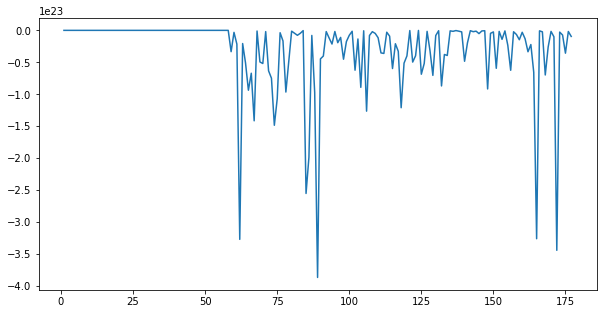

In [83]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

35 can be the optimal number of features to be chosen and start the elimination with.




In [84]:
from sklearn.feature_selection import RFE

rfe = RFE(lm, 35)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 49),
 ('LotFrontage', False, 126),
 ('LotArea', False, 7),
 ('OverallQual', False, 8),
 ('OverallCond', False, 3),
 ('MasVnrArea', False, 134),
 ('BsmtFinSF1', False, 18),
 ('BsmtFinSF2', False, 104),
 ('BsmtUnfSF', False, 74),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 52),
 ('2ndFlrSF', False, 87),
 ('LowQualFinSF', False, 79),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 54),
 ('FullBath', False, 119),
 ('HalfBath', False, 113),
 ('BedroomAbvGr', False, 143),
 ('TotRmsAbvGrd', False, 123),
 ('Fireplaces', False, 139),
 ('GarageCars', False, 11),
 ('GarageArea', False, 107),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 131),
 ('EnclosedPorch', False, 96),
 ('3SsnPorch', False, 130),
 ('ScreenPorch', False, 69),
 ('PoolArea', False, 73),
 ('MiscVal', False, 112),
 ('MoSold', False, 108),
 ('YrSold', False, 95),
 ('Total_Years_Since_Built', True, 1),
 ('Remodelled_Total_Years_Since_Built', False, 32),
 ('Total_Years_Since_Garage_Built', False, 80

In [86]:
X_train_1=X_train.loc[:,rfe.support_]
X_train_1.columns

Index(['TotalBsmtSF', 'GrLivArea', 'Total_Years_Since_Built', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_No Basement', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_CarPort', 'SaleType_Con',
       'SaleType_ConLD'],
      dtype='object')

In [87]:
import statsmodels.api as sm  
X_train_1_rfe = sm.add_constant(X_train_1)
X_train_1_rfe

const  TotalBsmtSF  GrLivArea  Total_Years_Since_Built  MSZoning_FV  \
210     1.0     0.024236  -1.532855                 1.285669            0   
318     1.0     0.391760   1.848308                -0.543578            0   
239     1.0    -0.109553   0.107037                 0.935844            0   
986     1.0    -0.453362   0.393688                 1.503509            0   
1416    1.0    -0.063579   1.411660                 1.808757            0   
390     1.0     0.021358  -0.147153                 1.633076            0   
1005    1.0     0.132697  -1.137054                 0.122067            0   
568     1.0     0.478611   1.195634                -0.094732            0   
342     1.0    -5.578102  -0.972959                 0.855025            0   
114     1.0     0.168059   1.450989                 0.935844            0   
499     1.0     0.068975  -1.369590                 0.655685            0   
365     1.0    -0.183683  -0.198411                 1.361816            0   
308     1.0     0.021358  -1.543358                 1.031160            0   
797     1.0    -0.067849  -1.868893                 0.769649            0   
703     1.0    -0.699675   0.704245                 1.633076            0   
858     1.0     0.216527  -0.140530                 0.155365            0   
25      1.0     0.516470   0.328312                -1.542343            0   
88      1.0     0.155894   0.185250                 1.434318            0   
1129    1.0     0.090471  -1.291149                 0.017542            0   
1425    1.0     0.331218  -0.412606                 0.631826            0   
728     1.0     0.525931   0.643613                 0.655685            0   
883     1.0    -0.044631   1.331432                 1.476211            0   
606     1.0     0.177664  -0.972959                -0.709016            0   
1183    1.0     0.238999  -0.722285                 1.361816            0   
808     1.0     0.164833  -0.842242                 0.453384            0   
452     1.0     0.031862   0.609395                -0.709016            0   
1395    1.0     0.219559   1.654954                -1.352719            0   
1078    1.0     0.008769  -1.589297                -1.266123            0   
146     1.0    -0.132375  -1.494654                 1.188933            0   
906     1.0     0.546068   0.395536                -1.444566            0   
614     1.0    -0.237066  -2.486404                 0.281689            0   
405     1.0     0.350173   0.365843                 0.155365            0   
45      1.0     0.609389   0.602505                -1.352719            0   
1443    1.0     0.104497  -1.239964                 1.420093            0   
1241    1.0     0.579069   0.491860                -1.542343            0   
537     1.0     0.024236  -1.532855                 0.281689            0   
454     1.0     0.597969   0.560831                 0.155365            0   
160     1.0     0.317888  -0.461249                -0.134085            0   
1433    1.0     0.090471   0.670710                -0.962105            0   
1037    1.0     0.189516   1.375821                -1.032583            0   
106     1.0    -0.222749  -0.952699                 1.808757            0   
1307    1.0     0.136888  -1.121763                -0.596742            0   
876     1.0     0.196546  -0.972959                 0.532446            0   
771     1.0    -0.003024  -0.490814                 0.812938            0   
890     1.0    -0.183683  -1.330115                 0.855025            0   
420     1.0     0.389914  -0.198411                -0.768436            0   
1446    1.0     0.287786  -0.571100                 0.557909            0   
1315    1.0     0.104497   1.167155                 0.369967            0   
384     1.0     0.523838   0.930659                -0.492217            0   
1047    1.0     0.136888  -1.121763                -0.596742            0   
1333    1.0    -0.036346  -0.162661                 1.067668            0   
13

In [88]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm

In [89]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:                 522.97
No. Observations:                1021   AIC:                            -975.9
Df Residuals:                     986   BIC:                            -803.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.1870      0.123     99.162      0.000      11.946      12.428
TotalBsmtSF                  0.1489      0.020      7.285      0.000       0.109       0.189
GrLivArea                    0.1608      0.006     28.087      0.000       0.150       0.172
Total_Years_Since_Built     -0.0830      0.010     -8.688      0.000      -0.102      -0.064
MSZoning_FV                  0.4478      0.073      6.104      0.000       0.304       0.592
MSZoning_RH                  0.4790      0.071      6.754      0.000       0.340       0.618
MSZoning_RL                  0.5444      0.059      9.304      0.000       0.430       0.659
MSZoning_RM                  0.4140      0.059      7.011      0.000       0.298       0.530
LotShape_IR3                -0.1014      0.050     -2.015      0.044      -0.200      -0.003
Neighborhood_ClearCr         0.0852      0.035      2.459      0.014       0.017       0.153
Neighborhood_Crawfor         0.1767      0.028      6.325      0.000       0.122       0.231
Neighborhood_Edwards        -0.1472      0.019     -7.884      0.000      -0.184      -0.111
Neighborhood_NoRidge         0.2008      0.028      7.161      0.000       0.146       0.256
Neighborhood_NridgHt         0.0955      0.024      3.909      0.000       0.048       0.143
Neighborhood_Somerst         0.1227      0.040      3.059      0.002       0.044       0.201
Neighborhood_StoneBr         0.1356      0.042      3.202      0.001       0.052       0.219
Exterior1st_BrkComm         -0.2388      0.108     -2.203      0.028      -0.452      -0.026
Exterior1st_BrkFace          0.1053      0.029      3.681      0.000       0.049       0.161
Exterior1st_CBlock          -0.2342      0.148     -1.583      0.114      -0.525       0.056
Exterior2nd_AsphShn         -0.0995      0.151     -0.658      0.510      -0.396       0.197
ExterCond_Fa                -0.6473      0.112     -5.782      0.000      -0.867      -0.428
ExterCond_Gd                -0.4161      0.106     -3.930      0.000      -0.624      -0.208
ExterCond_TA                -0.4681      0.105     -4.449      0.000      -0.675      -0.262
Foundation_Stone             0.2878      0.088      3.275      0.001       0.115       0.460
BsmtQual_Fa                 -0.1569      0.041     -3.786      0.000      -0.238      -0.076
BsmtQual_Gd                 -0.1099      0.021     -5.117      0.000      -0.152      -0.068
BsmtQual_No Basement         0.2405      0.062      3.884      0.000       0.119       0.362
BsmtQual_TA                 -0.1469      0.027     -5.465      0.000      -0.200      -0.094
BsmtExposure_Gd              0.1204      0.017      7.101      0.000       0.087       0.154
BsmtFinType1_No Basement     0.2405      0.062      3.884      0.000       0.119       0.362
KitchenQual_Fa

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
28  BsmtFinType1_No Basement     inf
25      BsmtQual_No Basement     inf
21              ExterCond_TA  122.67
5                MSZoning_RL   98.98
0                TotalBsmtSF   19.55
6                MSZoning_RM   19.25
20              ExterCond_Gd   15.44
31            KitchenQual_TA   15.05
26               BsmtQual_TA   14.81
30            KitchenQual_Gd   10.16
3                MSZoning_FV    9.66
24               BsmtQual_Gd    8.96
13      Neighborhood_Somerst    4.43
2    Total_Years_Since_Built    4.28
19              ExterCond_Fa    3.70
4                MSZoning_RH    2.58
23               BsmtQual_Fa    1.97
29            KitchenQual_Fa    1.93
12      Neighborhood_NridgHt    1.60
1                  GrLivArea    1.54
27           BsmtExposure_Gd    1.33
10      Neighborhood_Edwards    1.23
11      Neighborhood_NoRidge    1.23
34            SaleType_ConLD    1.16
9       Neighborhood_Crawfor    1.15
16       Exterior1st_BrkFace    1.13
8       Neighborhood_ClearCr    1.10
15       Exterior1st_BrkComm    1.08
14      Neighborhood_StoneBr    1.07
22          Foundation_Stone    1.06
18       Exterior2nd_AsphShn    1.05
7               LotShape_IR3    1.05
32        GarageType_CarPort    1.05
33              SaleType_Con    1.04
17        Exterior1st_CBlock    1.01

**Doing feature-engineering by removing columns based on their high p-values and high vif values**

In [91]:

X_train_1_rfe=X_train_1_rfe.drop(['Exterior2nd_AsphShn'],axis=1)

In [92]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:                 522.74
No. Observations:                1021   AIC:                            -977.5
Df Residuals:                     987   BIC:                            -809.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.1873      0.123     99.193      0.000      11.946      12.428
TotalBsmtSF                  0.1489      0.020      7.291      0.000       0.109       0.189
GrLivArea                    0.1606      0.006     28.090      0.000       0.149       0.172
Total_Years_Since_Built     -0.0829      0.010     -8.682      0.000      -0.102      -0.064
MSZoning_FV                  0.4483      0.073      6.113      0.000       0.304       0.592
MSZoning_RH                  0.4798      0.071      6.768      0.000       0.341       0.619
MSZoning_RL                  0.5449      0.058      9.316      0.000       0.430       0.660
MSZoning_RM                  0.4145      0.059      7.021      0.000       0.299       0.530
LotShape_IR3                -0.1013      0.050     -2.013      0.044      -0.200      -0.003
Neighborhood_ClearCr         0.0853      0.035      2.463      0.014       0.017       0.153
Neighborhood_Crawfor         0.1766      0.028      6.323      0.000       0.122       0.231
Neighborhood_Edwards        -0.1483      0.019     -7.980      0.000      -0.185      -0.112
Neighborhood_NoRidge         0.2008      0.028      7.167      0.000       0.146       0.256
Neighborhood_NridgHt         0.0955      0.024      3.908      0.000       0.048       0.143
Neighborhood_Somerst         0.1227      0.040      3.059      0.002       0.044       0.201
Neighborhood_StoneBr         0.1355      0.042      3.201      0.001       0.052       0.219
Exterior1st_BrkComm         -0.2364      0.108     -2.182      0.029      -0.449      -0.024
Exterior1st_BrkFace          0.1057      0.029      3.699      0.000       0.050       0.162
Exterior1st_CBlock          -0.2343      0.148     -1.584      0.114      -0.525       0.056
ExterCond_Fa                -0.6475      0.112     -5.786      0.000      -0.867      -0.428
ExterCond_Gd                -0.4166      0.106     -3.935      0.000      -0.624      -0.209
ExterCond_TA                -0.4685      0.105     -4.454      0.000      -0.675      -0.262
Foundation_Stone             0.2876      0.088      3.273      0.001       0.115       0.460
BsmtQual_Fa                 -0.1571      0.041     -3.791      0.000      -0.238      -0.076
BsmtQual_Gd                 -0.1100      0.021     -5.124      0.000      -0.152      -0.068
BsmtQual_No Basement         0.2390      0.062      3.862      0.000       0.118       0.360
BsmtQual_TA                 -0.1471      0.027     -5.474      0.000      -0.200      -0.094
BsmtExposure_Gd              0.1204      0.017      7.101      0.000       0.087       0.154
BsmtFinType1_No Basement     0.2390      0.062      3.862      0.000       0.118       0.360
KitchenQual_Fa              -0.2471      0.040     -6.217      0.000      -0.325      -0.169
KitchenQual_Gd

In [93]:
vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
24      BsmtQual_No Basement     inf
27  BsmtFinType1_No Basement     inf
20              ExterCond_TA  122.67
5                MSZoning_RL   98.95
0                TotalBsmtSF   19.55
6                MSZoning_RM   19.25
19              ExterCond_Gd   15.44
30            KitchenQual_TA   15.05
25               BsmtQual_TA   14.81
29            KitchenQual_Gd   10.16
3                MSZoning_FV    9.66
23               BsmtQual_Gd    8.96
13      Neighborhood_Somerst    4.43
2    Total_Years_Since_Built    4.28
18              ExterCond_Fa    3.70
4                MSZoning_RH    2.58
22               BsmtQual_Fa    1.97
28            KitchenQual_Fa    1.93
12      Neighborhood_NridgHt    1.60
1                  GrLivArea    1.53
26           BsmtExposure_Gd    1.33
11      Neighborhood_NoRidge    1.23
10      Neighborhood_Edwards    1.22
33            SaleType_ConLD    1.16
9       Neighborhood_Crawfor    1.15
16       Exterior1st_BrkFace    1.13
8       Neighborhood_ClearCr    1.10
15       Exterior1st_BrkComm    1.08
14      Neighborhood_StoneBr    1.07
21          Foundation_Stone    1.06
7               LotShape_IR3    1.05
31        GarageType_CarPort    1.05
32              SaleType_Con    1.04
17        Exterior1st_CBlock    1.01

In [94]:

X_train_1_rfe=X_train_1_rfe.drop(['SaleType_Con'],axis=1)

In [95]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:                 522.05
No. Observations:                1021   AIC:                            -978.1
Df Residuals:                     988   BIC:                            -815.5
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.1869      0.123     99.173      0.000      11.946      12.428
TotalBsmtSF                  0.1486      0.020      7.274      0.000       0.109       0.189
GrLivArea                    0.1607      0.006     28.097      0.000       0.149       0.172
Total_Years_Since_Built     -0.0831      0.010     -8.707      0.000      -0.102      -0.064
MSZoning_FV                  0.4506      0.073      6.145      0.000       0.307       0.594
MSZoning_RH                  0.4797      0.071      6.765      0.000       0.341       0.619
MSZoning_RL                  0.5446      0.058      9.309      0.000       0.430       0.659
MSZoning_RM                  0.4142      0.059      7.016      0.000       0.298       0.530
LotShape_IR3                -0.1021      0.050     -2.030      0.043      -0.201      -0.003
Neighborhood_ClearCr         0.0846      0.035      2.443      0.015       0.017       0.153
Neighborhood_Crawfor         0.1762      0.028      6.311      0.000       0.121       0.231
Neighborhood_Edwards        -0.1482      0.019     -7.974      0.000      -0.185      -0.112
Neighborhood_NoRidge         0.2004      0.028      7.149      0.000       0.145       0.255
Neighborhood_NridgHt         0.0954      0.024      3.904      0.000       0.047       0.143
Neighborhood_Somerst         0.1225      0.040      3.054      0.002       0.044       0.201
Neighborhood_StoneBr         0.1353      0.042      3.197      0.001       0.052       0.218
Exterior1st_BrkComm         -0.2361      0.108     -2.179      0.030      -0.449      -0.024
Exterior1st_BrkFace          0.1100      0.028      3.881      0.000       0.054       0.166
Exterior1st_CBlock          -0.2339      0.148     -1.581      0.114      -0.524       0.056
ExterCond_Fa                -0.6476      0.112     -5.785      0.000      -0.867      -0.428
ExterCond_Gd                -0.4169      0.106     -3.938      0.000      -0.625      -0.209
ExterCond_TA                -0.4687      0.105     -4.455      0.000      -0.675      -0.262
Foundation_Stone             0.2874      0.088      3.270      0.001       0.115       0.460
BsmtQual_Fa                 -0.1562      0.041     -3.771      0.000      -0.238      -0.075
BsmtQual_Gd                 -0.1094      0.021     -5.097      0.000      -0.152      -0.067
BsmtQual_No Basement         0.2381      0.062      3.848      0.000       0.117       0.360
BsmtQual_TA                 -0.1465      0.027     -5.451      0.000      -0.199      -0.094
BsmtExposure_Gd              0.1217      0.017      7.195      0.000       0.089       0.155
BsmtFinType1_No Basement     0.2381      0.062      3.848      0.000       0.117       0.360
KitchenQual_Fa              -0.2466      0.040     -6.205      0.000      -0.325      -0.169
KitchenQual_Gd

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
24      BsmtQual_No Basement     inf
27  BsmtFinType1_No Basement     inf
20              ExterCond_TA  122.66
5                MSZoning_RL   98.94
0                TotalBsmtSF   19.55
6                MSZoning_RM   19.25
19              ExterCond_Gd   15.43
30            KitchenQual_TA   15.05
25               BsmtQual_TA   14.81
29            KitchenQual_Gd   10.16
3                MSZoning_FV    9.65
23               BsmtQual_Gd    8.96
13      Neighborhood_Somerst    4.43
2    Total_Years_Since_Built    4.27
18              ExterCond_Fa    3.70
4                MSZoning_RH    2.58
22               BsmtQual_Fa    1.97
28            KitchenQual_Fa    1.93
12      Neighborhood_NridgHt    1.60
1                  GrLivArea    1.53
26           BsmtExposure_Gd    1.33
11      Neighborhood_NoRidge    1.23
10      Neighborhood_Edwards    1.22
32            SaleType_ConLD    1.16
9       Neighborhood_Crawfor    1.15
16       Exterior1st_BrkFace    1.11
8       Neighborhood_ClearCr    1.10
15       Exterior1st_BrkComm    1.08
14      Neighborhood_StoneBr    1.07
21          Foundation_Stone    1.06
7               LotShape_IR3    1.05
31        GarageType_CarPort    1.05
17        Exterior1st_CBlock    1.01

In [97]:

X_train_1_rfe=X_train_1_rfe.drop(['Exterior1st_CBlock'],axis=1)



In [98]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:                 520.76
No. Observations:                1021   AIC:                            -977.5
Df Residuals:                     989   BIC:                            -819.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.1875      0.123     99.104      0.000      11.946      12.429
TotalBsmtSF                  0.1489      0.020      7.283      0.000       0.109       0.189
GrLivArea                    0.1606      0.006     28.061      0.000       0.149       0.172
Total_Years_Since_Built     -0.0838      0.010     -8.778      0.000      -0.102      -0.065
MSZoning_FV                  0.4499      0.073      6.131      0.000       0.306       0.594
MSZoning_RH                  0.4795      0.071      6.758      0.000       0.340       0.619
MSZoning_RL                  0.5437      0.059      9.287      0.000       0.429       0.659
MSZoning_RM                  0.4141      0.059      7.009      0.000       0.298       0.530
LotShape_IR3                -0.1022      0.050     -2.029      0.043      -0.201      -0.003
Neighborhood_ClearCr         0.0853      0.035      2.459      0.014       0.017       0.153
Neighborhood_Crawfor         0.1771      0.028      6.336      0.000       0.122       0.232
Neighborhood_Edwards        -0.1476      0.019     -7.936      0.000      -0.184      -0.111
Neighborhood_NoRidge         0.2005      0.028      7.150      0.000       0.145       0.256
Neighborhood_NridgHt         0.0952      0.024      3.891      0.000       0.047       0.143
Neighborhood_Somerst         0.1221      0.040      3.041      0.002       0.043       0.201
Neighborhood_StoneBr         0.1354      0.042      3.195      0.001       0.052       0.218
Exterior1st_BrkComm         -0.2365      0.108     -2.182      0.029      -0.449      -0.024
Exterior1st_BrkFace          0.1105      0.028      3.896      0.000       0.055       0.166
ExterCond_Fa                -0.6477      0.112     -5.782      0.000      -0.867      -0.428
ExterCond_Gd                -0.4170      0.106     -3.936      0.000      -0.625      -0.209
ExterCond_TA                -0.4693      0.105     -4.458      0.000      -0.676      -0.263
Foundation_Stone             0.2878      0.088      3.273      0.001       0.115       0.460
BsmtQual_Fa                 -0.1551      0.041     -3.741      0.000      -0.236      -0.074
BsmtQual_Gd                 -0.1091      0.021     -5.080      0.000      -0.151      -0.067
BsmtQual_No Basement         0.2394      0.062      3.866      0.000       0.118       0.361
BsmtQual_TA                 -0.1460      0.027     -5.430      0.000      -0.199      -0.093
BsmtExposure_Gd              0.1218      0.017      7.193      0.000       0.089       0.155
BsmtFinType1_No Basement     0.2394      0.062      3.866      0.000       0.118       0.361
KitchenQual_Fa              -0.2462      0.040     -6.188      0.000      -0.324      -0.168
KitchenQual_Gd              -0.1131      0.023     -4.856      0.000      -0.159      -0.067
KitchenQual_TA

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
23      BsmtQual_No Basement     inf
26  BsmtFinType1_No Basement     inf
19              ExterCond_TA  122.66
5                MSZoning_RL   98.94
0                TotalBsmtSF   19.54
6                MSZoning_RM   19.25
18              ExterCond_Gd   15.43
29            KitchenQual_TA   15.05
24               BsmtQual_TA   14.80
28            KitchenQual_Gd   10.16
3                MSZoning_FV    9.65
22               BsmtQual_Gd    8.96
13      Neighborhood_Somerst    4.43
2    Total_Years_Since_Built    4.27
17              ExterCond_Fa    3.70
4                MSZoning_RH    2.58
21               BsmtQual_Fa    1.97
27            KitchenQual_Fa    1.93
12      Neighborhood_NridgHt    1.60
1                  GrLivArea    1.53
25           BsmtExposure_Gd    1.33
11      Neighborhood_NoRidge    1.23
10      Neighborhood_Edwards    1.22
31            SaleType_ConLD    1.16
9       Neighborhood_Crawfor    1.15
16       Exterior1st_BrkFace    1.11
8       Neighborhood_ClearCr    1.10
15       Exterior1st_BrkComm    1.08
14      Neighborhood_StoneBr    1.07
20          Foundation_Stone    1.06
7               LotShape_IR3    1.05
30        GarageType_CarPort    1.05

In [100]:

X_train_1_rfe=X_train_1_rfe.drop(['BsmtQual_No Basement'],axis=1)



In [101]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 520.76
No. Observations:                1021   AIC:                            -977.5
Df Residuals:                     989   BIC:                            -819.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.1875      0.123     99.104      0.000      11.946      12.429
TotalBsmtSF                  0.1489      0.020      7.283      0.000       0.109       0.189
GrLivArea                    0.1606      0.006     28.061      0.000       0.149       0.172
Total_Years_Since_Built     -0.0838      0.010     -8.778      0.000      -0.102      -0.065
MSZoning_FV                  0.4499      0.073      6.131      0.000       0.306       0.594
MSZoning_RH                  0.4795      0.071      6.758      0.000       0.340       0.619
MSZoning_RL                  0.5437      0.059      9.287      0.000       0.429       0.659
MSZoning_RM                  0.4141      0.059      7.009      0.000       0.298       0.530
LotShape_IR3                -0.1022      0.050     -2.029      0.043      -0.201      -0.003
Neighborhood_ClearCr         0.0853      0.035      2.459      0.014       0.017       0.153
Neighborhood_Crawfor         0.1771      0.028      6.336      0.000       0.122       0.232
Neighborhood_Edwards        -0.1476      0.019     -7.936      0.000      -0.184      -0.111
Neighborhood_NoRidge         0.2005      0.028      7.150      0.000       0.145       0.256
Neighborhood_NridgHt         0.0952      0.024      3.891      0.000       0.047       0.143
Neighborhood_Somerst         0.1221      0.040      3.041      0.002       0.043       0.201
Neighborhood_StoneBr         0.1354      0.042      3.195      0.001       0.052       0.218
Exterior1st_BrkComm         -0.2365      0.108     -2.182      0.029      -0.449      -0.024
Exterior1st_BrkFace          0.1105      0.028      3.896      0.000       0.055       0.166
ExterCond_Fa                -0.6477      0.112     -5.782      0.000      -0.867      -0.428
ExterCond_Gd                -0.4170      0.106     -3.936      0.000      -0.625      -0.209
ExterCond_TA                -0.4693      0.105     -4.458      0.000      -0.676      -0.263
Foundation_Stone             0.2878      0.088      3.273      0.001       0.115       0.460
BsmtQual_Fa                 -0.1551      0.041     -3.741      0.000      -0.236      -0.074
BsmtQual_Gd                 -0.1091      0.021     -5.080      0.000      -0.151      -0.067
BsmtQual_TA                 -0.1460      0.027     -5.430      0.000      -0.199      -0.093
BsmtExposure_Gd              0.1218      0.017      7.193      0.000       0.089       0.155
BsmtFinType1_No Basement     0.4787      0.124      3.866      0.000       0.236       0.722
KitchenQual_Fa              -0.2462      0.040     -6.188      0.000      -0.324      -0.168
KitchenQual_Gd              -0.1131      0.023     -4.856      0.000      -0.159      -0.067
KitchenQual_TA              -0.1865      0.026     -7.314      0.000      -0.237      -0.136
GarageType_Car

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
19              ExterCond_TA  122.66
5                MSZoning_RL   98.94
25  BsmtFinType1_No Basement   20.34
0                TotalBsmtSF   19.54
6                MSZoning_RM   19.25
18              ExterCond_Gd   15.43
28            KitchenQual_TA   15.05
23               BsmtQual_TA   14.80
27            KitchenQual_Gd   10.16
3                MSZoning_FV    9.65
22               BsmtQual_Gd    8.96
13      Neighborhood_Somerst    4.43
2    Total_Years_Since_Built    4.27
17              ExterCond_Fa    3.70
4                MSZoning_RH    2.58
21               BsmtQual_Fa    1.97
26            KitchenQual_Fa    1.93
12      Neighborhood_NridgHt    1.60
1                  GrLivArea    1.53
24           BsmtExposure_Gd    1.33
11      Neighborhood_NoRidge    1.23
10      Neighborhood_Edwards    1.22
30            SaleType_ConLD    1.16
9       Neighborhood_Crawfor    1.15
16       Exterior1st_BrkFace    1.11
8       Neighborhood_ClearCr    1.10
15       Exterior1st_BrkComm    1.08
14      Neighborhood_StoneBr    1.07
20          Foundation_Stone    1.06
7               LotShape_IR3    1.05
29        GarageType_CarPort    1.05

In [103]:

X_train_1_rfe=X_train_1_rfe.drop(['ExterCond_TA'],axis=1)





In [104]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 510.61
No. Observations:                1021   AIC:                            -959.2
Df Residuals:                     990   BIC:                            -806.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.7191      0.064    181.759      0.000      11.593      11.846
TotalBsmtSF                  0.1502      0.021      7.278      0.000       0.110       0.191
GrLivArea                    0.1609      0.006     27.841      0.000       0.150       0.172
Total_Years_Since_Built     -0.0814      0.010     -8.461      0.000      -0.100      -0.063
MSZoning_FV                  0.4504      0.074      6.081      0.000       0.305       0.596
MSZoning_RH                  0.4789      0.072      6.686      0.000       0.338       0.619
MSZoning_RL                  0.5441      0.059      9.207      0.000       0.428       0.660
MSZoning_RM                  0.4167      0.060      6.987      0.000       0.300       0.534
LotShape_IR3                -0.1021      0.051     -2.009      0.045      -0.202      -0.002
Neighborhood_ClearCr         0.0840      0.035      2.400      0.017       0.015       0.153
Neighborhood_Crawfor         0.1748      0.028      6.196      0.000       0.119       0.230
Neighborhood_Edwards        -0.1417      0.019     -7.568      0.000      -0.178      -0.105
Neighborhood_NoRidge         0.1995      0.028      7.048      0.000       0.144       0.255
Neighborhood_NridgHt         0.0960      0.025      3.890      0.000       0.048       0.144
Neighborhood_Somerst         0.1230      0.041      3.036      0.002       0.044       0.203
Neighborhood_StoneBr         0.1349      0.043      3.155      0.002       0.051       0.219
Exterior1st_BrkComm         -0.2405      0.109     -2.197      0.028      -0.455      -0.026
Exterior1st_BrkFace          0.1092      0.029      3.813      0.000       0.053       0.165
ExterCond_Fa                -0.1799      0.040     -4.544      0.000      -0.258      -0.102
ExterCond_Gd                 0.0501      0.016      3.161      0.002       0.019       0.081
Foundation_Stone             0.2844      0.089      3.204      0.001       0.110       0.459
BsmtQual_Fa                 -0.1584      0.042     -3.785      0.000      -0.241      -0.076
BsmtQual_Gd                 -0.1095      0.022     -5.051      0.000      -0.152      -0.067
BsmtQual_TA                 -0.1463      0.027     -5.391      0.000      -0.200      -0.093
BsmtExposure_Gd              0.1211      0.017      7.085      0.000       0.088       0.155
BsmtFinType1_No Basement     0.4833      0.125      3.866      0.000       0.238       0.729
KitchenQual_Fa              -0.2499      0.040     -6.225      0.000      -0.329      -0.171
KitchenQual_Gd              -0.1118      0.024     -4.755      0.000      -0.158      -0.066
KitchenQual_TA              -0.1882      0.026     -7.312      0.000      -0.239      -0.138
GarageType_CarPort          -0.1341      0.058     -2.318      0.021      -0.248      -0.021
SaleType_ConLD

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5                MSZoning_RL  25.96
24  BsmtFinType1_No Basement  20.22
0                TotalBsmtSF  19.50
27            KitchenQual_TA  14.24
22               BsmtQual_TA  14.17
26            KitchenQual_Gd   9.76
21               BsmtQual_Gd   8.70
3                MSZoning_FV   5.73
6                MSZoning_RM   5.30
13      Neighborhood_Somerst   4.42
2    Total_Years_Since_Built   4.21
20               BsmtQual_Fa   1.93
25            KitchenQual_Fa   1.83
12      Neighborhood_NridgHt   1.56
1                  GrLivArea   1.53
4                MSZoning_RH   1.41
23           BsmtExposure_Gd   1.32
17              ExterCond_Fa   1.27
11      Neighborhood_NoRidge   1.22
10      Neighborhood_Edwards   1.22
18              ExterCond_Gd   1.21
29            SaleType_ConLD   1.15
9       Neighborhood_Crawfor   1.14
16       Exterior1st_BrkFace   1.11
8       Neighborhood_ClearCr   1.10
15       Exterior1st_BrkComm   1.08
14      Neighborhood_StoneBr   1.07
19          Foundation_Stone   1.06
7               LotShape_IR3   1.05
28        GarageType_CarPort   1.04

In [106]:

X_train_1_rfe=X_train_1_rfe.drop(['MSZoning_RL'],axis=1)





In [107]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 468.67
No. Observations:                1021   AIC:                            -877.3
Df Residuals:                     991   BIC:                            -729.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2480      0.030    402.005      0.000      12.188      12.308
TotalBsmtSF                  0.1592      0.021      7.415      0.000       0.117       0.201
GrLivArea                    0.1630      0.006     27.108      0.000       0.151       0.175
Total_Years_Since_Built     -0.0869      0.010     -8.696      0.000      -0.107      -0.067
MSZoning_FV                 -0.0898      0.047     -1.906      0.057      -0.182       0.003
MSZoning_RH                 -0.0537      0.044     -1.220      0.223      -0.140       0.033
MSZoning_RM                 -0.1158      0.015     -7.632      0.000      -0.146      -0.086
LotShape_IR3                -0.1076      0.053     -2.033      0.042      -0.211      -0.004
Neighborhood_ClearCr         0.0864      0.036      2.371      0.018       0.015       0.158
Neighborhood_Crawfor         0.1823      0.029      6.209      0.000       0.125       0.240
Neighborhood_Edwards        -0.1306      0.019     -6.710      0.000      -0.169      -0.092
Neighborhood_NoRidge         0.1958      0.029      6.640      0.000       0.138       0.254
Neighborhood_NridgHt         0.0929      0.026      3.615      0.000       0.042       0.143
Neighborhood_Somerst         0.1182      0.042      2.801      0.005       0.035       0.201
Neighborhood_StoneBr         0.1341      0.045      3.010      0.003       0.047       0.221
Exterior1st_BrkComm         -0.2321      0.114     -2.037      0.042      -0.456      -0.009
Exterior1st_BrkFace          0.1111      0.030      3.726      0.000       0.053       0.170
ExterCond_Fa                -0.1798      0.041     -4.361      0.000      -0.261      -0.099
ExterCond_Gd                 0.0501      0.017      3.039      0.002       0.018       0.083
Foundation_Stone             0.3001      0.092      3.246      0.001       0.119       0.481
BsmtQual_Fa                 -0.1394      0.044     -3.203      0.001      -0.225      -0.054
BsmtQual_Gd                 -0.1034      0.023     -4.582      0.000      -0.148      -0.059
BsmtQual_TA                 -0.1401      0.028     -4.959      0.000      -0.196      -0.085
BsmtExposure_Gd              0.1232      0.018      6.923      0.000       0.088       0.158
BsmtFinType1_No Basement     0.5532      0.130      4.257      0.000       0.298       0.808
KitchenQual_Fa              -0.2795      0.042     -6.707      0.000      -0.361      -0.198
KitchenQual_Gd              -0.1096      0.024     -4.475      0.000      -0.158      -0.062
KitchenQual_TA              -0.1850      0.027     -6.903      0.000      -0.238      -0.132
GarageType_CarPort          -0.2078      0.060     -3.482      0.001      -0.325      -0.091
SaleType_ConLD               0.0912      0.074      1.231      0.219      -0.054       0.236
==============

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                TotalBsmtSF  18.51
23  BsmtFinType1_No Basement  18.08
21               BsmtQual_TA  10.03
26            KitchenQual_TA   9.78
25            KitchenQual_Gd   7.31
20               BsmtQual_Gd   6.88
12      Neighborhood_Somerst   4.39
3                MSZoning_FV   4.14
2    Total_Years_Since_Built   3.73
19               BsmtQual_Fa   1.64
24            KitchenQual_Fa   1.61
1                  GrLivArea   1.49
5                MSZoning_RM   1.41
11      Neighborhood_NridgHt   1.36
22           BsmtExposure_Gd   1.28
16              ExterCond_Fa   1.27
10      Neighborhood_NoRidge   1.22
17              ExterCond_Gd   1.20
9       Neighborhood_Edwards   1.19
28            SaleType_ConLD   1.14
8       Neighborhood_Crawfor   1.12
15       Exterior1st_BrkFace   1.11
7       Neighborhood_ClearCr   1.10
14       Exterior1st_BrkComm   1.08
18          Foundation_Stone   1.06
13      Neighborhood_StoneBr   1.05
6               LotShape_IR3   1.05
4                MSZoning_RH   1.04
27        GarageType_CarPort   1.03

In [109]:

X_train_1_rfe=X_train_1_rfe.drop(['MSZoning_FV'],axis=1)





In [110]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 466.80
No. Observations:                1021   AIC:                            -875.6
Df Residuals:                     992   BIC:                            -732.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2500      0.030    401.776      0.000      12.190      12.310
TotalBsmtSF                  0.1653      0.021      7.780      0.000       0.124       0.207
GrLivArea                    0.1626      0.006     27.026      0.000       0.151       0.174
Total_Years_Since_Built     -0.0869      0.010     -8.684      0.000      -0.107      -0.067
MSZoning_RH                 -0.0532      0.044     -1.207      0.228      -0.140       0.033
MSZoning_RM                 -0.1147      0.015     -7.559      0.000      -0.145      -0.085
LotShape_IR3                -0.1089      0.053     -2.054      0.040      -0.213      -0.005
Neighborhood_ClearCr         0.0856      0.036      2.346      0.019       0.014       0.157
Neighborhood_Crawfor         0.1824      0.029      6.205      0.000       0.125       0.240
Neighborhood_Edwards        -0.1307      0.019     -6.706      0.000      -0.169      -0.092
Neighborhood_NoRidge         0.1947      0.030      6.596      0.000       0.137       0.253
Neighborhood_NridgHt         0.0900      0.026      3.502      0.000       0.040       0.140
Neighborhood_Somerst         0.0509      0.023      2.198      0.028       0.005       0.096
Neighborhood_StoneBr         0.1322      0.045      2.966      0.003       0.045       0.220
Exterior1st_BrkComm         -0.2334      0.114     -2.045      0.041      -0.457      -0.009
Exterior1st_BrkFace          0.1096      0.030      3.673      0.000       0.051       0.168
ExterCond_Fa                -0.1796      0.041     -4.349      0.000      -0.261      -0.099
ExterCond_Gd                 0.0504      0.017      3.050      0.002       0.018       0.083
Foundation_Stone             0.3023      0.093      3.266      0.001       0.121       0.484
BsmtQual_Fa                 -0.1375      0.044     -3.156      0.002      -0.223      -0.052
BsmtQual_Gd                 -0.1033      0.023     -4.572      0.000      -0.148      -0.059
BsmtQual_TA                 -0.1395      0.028     -4.932      0.000      -0.195      -0.084
BsmtExposure_Gd              0.1226      0.018      6.882      0.000       0.088       0.158
BsmtFinType1_No Basement     0.5888      0.129      4.573      0.000       0.336       0.842
KitchenQual_Fa              -0.2825      0.042     -6.773      0.000      -0.364      -0.201
KitchenQual_Gd              -0.1131      0.024     -4.626      0.000      -0.161      -0.065
KitchenQual_TA              -0.1884      0.027     -7.035      0.000      -0.241      -0.136
GarageType_CarPort          -0.2076      0.060     -3.475      0.001      -0.325      -0.090
SaleType_ConLD               0.0915      0.074      1.234      0.217      -0.054       0.237
==============================================================================
Omnibus:                    

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                TotalBsmtSF  18.02
22  BsmtFinType1_No Basement  17.58
20               BsmtQual_TA  10.01
25            KitchenQual_TA   9.75
24            KitchenQual_Gd   7.28
19               BsmtQual_Gd   6.87
2    Total_Years_Since_Built   3.73
18               BsmtQual_Fa   1.64
23            KitchenQual_Fa   1.61
1                  GrLivArea   1.49
4                MSZoning_RM   1.41
10      Neighborhood_NridgHt   1.36
11      Neighborhood_Somerst   1.31
21           BsmtExposure_Gd   1.28
15              ExterCond_Fa   1.27
9       Neighborhood_NoRidge   1.22
16              ExterCond_Gd   1.20
8       Neighborhood_Edwards   1.19
27            SaleType_ConLD   1.14
7       Neighborhood_Crawfor   1.12
14       Exterior1st_BrkFace   1.11
6       Neighborhood_ClearCr   1.10
13       Exterior1st_BrkComm   1.08
17          Foundation_Stone   1.06
12      Neighborhood_StoneBr   1.05
5               LotShape_IR3   1.05
3                MSZoning_RH   1.04
26        GarageType_CarPort   1.03

In [112]:

X_train_1_rfe=X_train_1_rfe.drop(['MSZoning_RH'],axis=1)





In [113]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     209.2
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 466.05
No. Observations:                1021   AIC:                            -876.1
Df Residuals:                     993   BIC:                            -738.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2488      0.030    401.883      0.000      12.189      12.309
TotalBsmtSF                  0.1658      0.021      7.804      0.000       0.124       0.208
GrLivArea                    0.1624      0.006     26.998      0.000       0.151       0.174
Total_Years_Since_Built     -0.0876      0.010     -8.761      0.000      -0.107      -0.068
MSZoning_RM                 -0.1132      0.015     -7.483      0.000      -0.143      -0.084
LotShape_IR3                -0.1083      0.053     -2.044      0.041      -0.212      -0.004
Neighborhood_ClearCr         0.0867      0.036      2.375      0.018       0.015       0.158
Neighborhood_Crawfor         0.1820      0.029      6.191      0.000       0.124       0.240
Neighborhood_Edwards        -0.1299      0.019     -6.670      0.000      -0.168      -0.092
Neighborhood_NoRidge         0.1954      0.030      6.618      0.000       0.137       0.253
Neighborhood_NridgHt         0.0901      0.026      3.505      0.000       0.040       0.141
Neighborhood_Somerst         0.0511      0.023      2.210      0.027       0.006       0.097
Neighborhood_StoneBr         0.1326      0.045      2.975      0.003       0.045       0.220
Exterior1st_BrkComm         -0.2318      0.114     -2.031      0.042      -0.456      -0.008
Exterior1st_BrkFace          0.1108      0.030      3.713      0.000       0.052       0.169
ExterCond_Fa                -0.1773      0.041     -4.297      0.000      -0.258      -0.096
ExterCond_Gd                 0.0514      0.017      3.116      0.002       0.019       0.084
Foundation_Stone             0.3041      0.093      3.285      0.001       0.122       0.486
BsmtQual_Fa                 -0.1382      0.044     -3.172      0.002      -0.224      -0.053
BsmtQual_Gd                 -0.1032      0.023     -4.565      0.000      -0.148      -0.059
BsmtQual_TA                 -0.1391      0.028     -4.916      0.000      -0.195      -0.084
BsmtExposure_Gd              0.1229      0.018      6.897      0.000       0.088       0.158
BsmtFinType1_No Basement     0.5913      0.129      4.592      0.000       0.339       0.844
KitchenQual_Fa              -0.2859      0.042     -6.869      0.000      -0.368      -0.204
KitchenQual_Gd              -0.1132      0.024     -4.627      0.000      -0.161      -0.065
KitchenQual_TA              -0.1888      0.027     -7.047      0.000      -0.241      -0.136
GarageType_CarPort          -0.2059      0.060     -3.447      0.001      -0.323      -0.089
SaleType_ConLD               0.0922      0.074      1.243      0.214      -0.053       0.238
==============================================================================
Omnibus:                      380.745   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Ja

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                TotalBsmtSF  18.02
21  BsmtFinType1_No Basement  17.58
19               BsmtQual_TA  10.01
24            KitchenQual_TA   9.73
23            KitchenQual_Gd   7.27
18               BsmtQual_Gd   6.87
2    Total_Years_Since_Built   3.72
17               BsmtQual_Fa   1.64
22            KitchenQual_Fa   1.59
1                  GrLivArea   1.49
3                MSZoning_RM   1.40
9       Neighborhood_NridgHt   1.36
10      Neighborhood_Somerst   1.31
20           BsmtExposure_Gd   1.28
14              ExterCond_Fa   1.27
8       Neighborhood_NoRidge   1.22
15              ExterCond_Gd   1.20
7       Neighborhood_Edwards   1.19
26            SaleType_ConLD   1.14
6       Neighborhood_Crawfor   1.12
5       Neighborhood_ClearCr   1.10
13       Exterior1st_BrkFace   1.10
12       Exterior1st_BrkComm   1.08
16          Foundation_Stone   1.06
11      Neighborhood_StoneBr   1.05
4               LotShape_IR3   1.05
25        GarageType_CarPort   1.03

In [115]:

X_train_1_rfe=X_train_1_rfe.drop(['SaleType_ConLD'],axis=1)





In [116]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     217.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:14   Log-Likelihood:                 465.26
No. Observations:                1021   AIC:                            -876.5
Df Residuals:                     994   BIC:                            -743.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2479      0.030    401.843      0.000      12.188      12.308
TotalBsmtSF                  0.1652      0.021      7.775      0.000       0.124       0.207
GrLivArea                    0.1628      0.006     27.097      0.000       0.151       0.175
Total_Years_Since_Built     -0.0879      0.010     -8.797      0.000      -0.108      -0.068
MSZoning_RM                 -0.1138      0.015     -7.528      0.000      -0.144      -0.084
LotShape_IR3                -0.1085      0.053     -2.047      0.041      -0.213      -0.004
Neighborhood_ClearCr         0.0861      0.036      2.360      0.018       0.015       0.158
Neighborhood_Crawfor         0.1814      0.029      6.168      0.000       0.124       0.239
Neighborhood_Edwards        -0.1284      0.019     -6.603      0.000      -0.167      -0.090
Neighborhood_NoRidge         0.1948      0.030      6.600      0.000       0.137       0.253
Neighborhood_NridgHt         0.0900      0.026      3.499      0.000       0.040       0.140
Neighborhood_Somerst         0.0509      0.023      2.199      0.028       0.005       0.096
Neighborhood_StoneBr         0.1326      0.045      2.973      0.003       0.045       0.220
Exterior1st_BrkComm         -0.2422      0.114     -2.127      0.034      -0.466      -0.019
Exterior1st_BrkFace          0.1103      0.030      3.697      0.000       0.052       0.169
ExterCond_Fa                -0.1616      0.039     -4.113      0.000      -0.239      -0.085
ExterCond_Gd                 0.0513      0.017      3.109      0.002       0.019       0.084
Foundation_Stone             0.2988      0.092      3.231      0.001       0.117       0.480
BsmtQual_Fa                 -0.1381      0.044     -3.167      0.002      -0.224      -0.053
BsmtQual_Gd                 -0.1029      0.023     -4.550      0.000      -0.147      -0.059
BsmtQual_TA                 -0.1376      0.028     -4.866      0.000      -0.193      -0.082
BsmtExposure_Gd              0.1237      0.018      6.945      0.000       0.089       0.159
BsmtFinType1_No Basement     0.5909      0.129      4.587      0.000       0.338       0.844
KitchenQual_Fa              -0.2857      0.042     -6.862      0.000      -0.367      -0.204
KitchenQual_Gd              -0.1128      0.024     -4.610      0.000      -0.161      -0.065
KitchenQual_TA              -0.1886      0.027     -7.038      0.000      -0.241      -0.136
GarageType_CarPort          -0.2060      0.060     -3.447      0.001      -0.323      -0.089
==============================================================================
Omnibus:                      380.952   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3343.603
Skew:                          -1.462   Prob(JB):       

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                TotalBsmtSF  18.00
21  BsmtFinType1_No Basement  17.58
19               BsmtQual_TA  10.00
24            KitchenQual_TA   9.73
23            KitchenQual_Gd   7.27
18               BsmtQual_Gd   6.87
2    Total_Years_Since_Built   3.72
17               BsmtQual_Fa   1.64
22            KitchenQual_Fa   1.59
1                  GrLivArea   1.48
3                MSZoning_RM   1.40
9       Neighborhood_NridgHt   1.36
10      Neighborhood_Somerst   1.31
20           BsmtExposure_Gd   1.28
8       Neighborhood_NoRidge   1.22
15              ExterCond_Gd   1.20
7       Neighborhood_Edwards   1.19
14              ExterCond_Fa   1.15
6       Neighborhood_Crawfor   1.12
13       Exterior1st_BrkFace   1.10
5       Neighborhood_ClearCr   1.10
12       Exterior1st_BrkComm   1.07
16          Foundation_Stone   1.06
11      Neighborhood_StoneBr   1.05
4               LotShape_IR3   1.05
25        GarageType_CarPort   1.03

In [118]:

X_train_1_rfe=X_train_1_rfe.drop(['TotalBsmtSF'],axis=1)







In [119]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 435.12
No. Observations:                1021   AIC:                            -818.2
Df Residuals:                     995   BIC:                            -690.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.3042      0.030    403.672      0.000      12.244      12.364
GrLivArea                    0.1746      0.006     29.162      0.000       0.163       0.186
Total_Years_Since_Built     -0.0986      0.010     -9.672      0.000      -0.119      -0.079
MSZoning_RM                 -0.1359      0.015     -8.890      0.000      -0.166      -0.106
LotShape_IR3                -0.0883      0.055     -1.620      0.106      -0.195       0.019
Neighborhood_ClearCr         0.1057      0.037      2.819      0.005       0.032       0.179
Neighborhood_Crawfor         0.1790      0.030      5.912      0.000       0.120       0.238
Neighborhood_Edwards        -0.1288      0.020     -6.432      0.000      -0.168      -0.089
Neighborhood_NoRidge         0.2105      0.030      6.941      0.000       0.151       0.270
Neighborhood_NridgHt         0.1035      0.026      3.922      0.000       0.052       0.155
Neighborhood_Somerst         0.0366      0.024      1.541      0.124      -0.010       0.083
Neighborhood_StoneBr         0.1557      0.046      3.400      0.001       0.066       0.246
Exterior1st_BrkComm         -0.2071      0.117     -1.769      0.077      -0.437       0.023
Exterior1st_BrkFace          0.1393      0.030      4.569      0.000       0.079       0.199
ExterCond_Fa                -0.1654      0.040     -4.089      0.000      -0.245      -0.086
ExterCond_Gd                 0.0473      0.017      2.785      0.005       0.014       0.081
Foundation_Stone             0.2403      0.095      2.532      0.011       0.054       0.426
BsmtQual_Fa                 -0.1799      0.045     -4.040      0.000      -0.267      -0.093
BsmtQual_Gd                 -0.1201      0.023     -5.183      0.000      -0.166      -0.075
BsmtQual_TA                 -0.1482      0.029     -5.096      0.000      -0.205      -0.091
BsmtExposure_Gd              0.1489      0.018      8.260      0.000       0.114       0.184
BsmtFinType1_No Basement    -0.3607      0.041     -8.723      0.000      -0.442      -0.280
KitchenQual_Fa              -0.3117      0.043     -7.296      0.000      -0.395      -0.228
KitchenQual_Gd              -0.1285      0.025     -5.118      0.000      -0.178      -0.079
KitchenQual_TA              -0.2084      0.027     -7.589      0.000      -0.262      -0.154
GarageType_CarPort          -0.2004      0.062     -3.258      0.001      -0.321      -0.080
==============================================================================
Omnibus:                      310.822   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2010.615
Skew:                          -1.234   Prob(JB):                         0.00
Kurtosis:                       9.417   Cond. No.                     

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
18               BsmtQual_TA  9.87
23            KitchenQual_TA  9.70
22            KitchenQual_Gd  7.25
17               BsmtQual_Gd  6.87
1    Total_Years_Since_Built  3.50
20  BsmtFinType1_No Basement  1.65
16               BsmtQual_Fa  1.64
21            KitchenQual_Fa  1.59
2                MSZoning_RM  1.37
0                  GrLivArea  1.34
8       Neighborhood_NridgHt  1.31
9       Neighborhood_Somerst  1.30
19           BsmtExposure_Gd  1.21
7       Neighborhood_NoRidge  1.21
14              ExterCond_Gd  1.20
6       Neighborhood_Edwards  1.19
13              ExterCond_Fa  1.15
5       Neighborhood_Crawfor  1.12
4       Neighborhood_ClearCr  1.10
12       Exterior1st_BrkFace  1.08
11       Exterior1st_BrkComm  1.07
15          Foundation_Stone  1.05
10      Neighborhood_StoneBr  1.04
3               LotShape_IR3  1.04
24        GarageType_CarPort  1.03

In [121]:

X_train_1_rfe=X_train_1_rfe.drop(['Neighborhood_Somerst'],axis=1)







In [122]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 433.90
No. Observations:                1021   AIC:                            -817.8
Df Residuals:                     996   BIC:                            -694.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.3099      0.030    406.617      0.000      12.250      12.369
GrLivArea                    0.1746      0.006     29.147      0.000       0.163       0.186
Total_Years_Since_Built     -0.1022      0.010    -10.283      0.000      -0.122      -0.083
MSZoning_RM                 -0.1361      0.015     -8.897      0.000      -0.166      -0.106
LotShape_IR3                -0.0930      0.054     -1.707      0.088      -0.200       0.014
Neighborhood_ClearCr         0.1049      0.038      2.796      0.005       0.031       0.178
Neighborhood_Crawfor         0.1786      0.030      5.896      0.000       0.119       0.238
Neighborhood_Edwards        -0.1298      0.020     -6.480      0.000      -0.169      -0.090
Neighborhood_NoRidge         0.2045      0.030      6.795      0.000       0.145       0.264
Neighborhood_NridgHt         0.0942      0.026      3.664      0.000       0.044       0.145
Neighborhood_StoneBr         0.1489      0.046      3.264      0.001       0.059       0.238
Exterior1st_BrkComm         -0.2074      0.117     -1.769      0.077      -0.437       0.023
Exterior1st_BrkFace          0.1389      0.031      4.552      0.000       0.079       0.199
ExterCond_Fa                -0.1639      0.040     -4.052      0.000      -0.243      -0.085
ExterCond_Gd                 0.0464      0.017      2.734      0.006       0.013       0.080
Foundation_Stone             0.2399      0.095      2.526      0.012       0.054       0.426
BsmtQual_Fa                 -0.1786      0.045     -4.008      0.000      -0.266      -0.091
BsmtQual_Gd                 -0.1213      0.023     -5.234      0.000      -0.167      -0.076
BsmtQual_TA                 -0.1490      0.029     -5.122      0.000      -0.206      -0.092
BsmtExposure_Gd              0.1459      0.018      8.135      0.000       0.111       0.181
BsmtFinType1_No Basement    -0.3622      0.041     -8.756      0.000      -0.443      -0.281
KitchenQual_Fa              -0.3125      0.043     -7.311      0.000      -0.396      -0.229
KitchenQual_Gd              -0.1291      0.025     -5.140      0.000      -0.178      -0.080
KitchenQual_TA              -0.2104      0.027     -7.668      0.000      -0.264      -0.157
GarageType_CarPort          -0.1998      0.062     -3.246      0.001      -0.321      -0.079
==============================================================================
Omnibus:                      308.488   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2013.626
Skew:                          -1.220   Prob(JB):                         0.00
Kurtosis:                       9.433   Cond. No.                         32.5
==============================================================================

Note

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17               BsmtQual_TA  9.83
22            KitchenQual_TA  9.69
21            KitchenQual_Gd  7.23
16               BsmtQual_Gd  6.86
1    Total_Years_Since_Built  3.18
19  BsmtFinType1_No Basement  1.65
15               BsmtQual_Fa  1.63
20            KitchenQual_Fa  1.59
2                MSZoning_RM  1.37
0                  GrLivArea  1.34
8       Neighborhood_NridgHt  1.26
18           BsmtExposure_Gd  1.20
6       Neighborhood_Edwards  1.19
7       Neighborhood_NoRidge  1.19
13              ExterCond_Gd  1.19
12              ExterCond_Fa  1.15
5       Neighborhood_Crawfor  1.12
4       Neighborhood_ClearCr  1.10
11       Exterior1st_BrkFace  1.08
10       Exterior1st_BrkComm  1.07
14          Foundation_Stone  1.05
3               LotShape_IR3  1.04
9       Neighborhood_StoneBr  1.03
23        GarageType_CarPort  1.03

In [124]:

X_train_1_rfe=X_train_1_rfe.drop(['LotShape_IR3'],axis=1)







In [125]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 432.41
No. Observations:                1021   AIC:                            -816.8
Df Residuals:                     997   BIC:                            -698.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.3084      0.030    406.350      0.000      12.249      12.368
GrLivArea                    0.1740      0.006     29.070      0.000       0.162       0.186
Total_Years_Since_Built     -0.1017      0.010    -10.232      0.000      -0.121      -0.082
MSZoning_RM                 -0.1364      0.015     -8.904      0.000      -0.166      -0.106
Neighborhood_ClearCr         0.1068      0.038      2.845      0.005       0.033       0.180
Neighborhood_Crawfor         0.1797      0.030      5.930      0.000       0.120       0.239
Neighborhood_Edwards        -0.1304      0.020     -6.508      0.000      -0.170      -0.091
Neighborhood_NoRidge         0.2071      0.030      6.885      0.000       0.148       0.266
Neighborhood_NridgHt         0.0968      0.026      3.769      0.000       0.046       0.147
Neighborhood_StoneBr         0.1508      0.046      3.302      0.001       0.061       0.240
Exterior1st_BrkComm         -0.2076      0.117     -1.769      0.077      -0.438       0.023
Exterior1st_BrkFace          0.1362      0.030      4.467      0.000       0.076       0.196
ExterCond_Fa                -0.1632      0.040     -4.030      0.000      -0.243      -0.084
ExterCond_Gd                 0.0471      0.017      2.769      0.006       0.014       0.080
Foundation_Stone             0.2405      0.095      2.531      0.012       0.054       0.427
BsmtQual_Fa                 -0.1802      0.045     -4.041      0.000      -0.268      -0.093
BsmtQual_Gd                 -0.1203      0.023     -5.188      0.000      -0.166      -0.075
BsmtQual_TA                 -0.1468      0.029     -5.045      0.000      -0.204      -0.090
BsmtExposure_Gd              0.1441      0.018      8.042      0.000       0.109       0.179
BsmtFinType1_No Basement    -0.3594      0.041     -8.687      0.000      -0.441      -0.278
KitchenQual_Fa              -0.3137      0.043     -7.334      0.000      -0.398      -0.230
KitchenQual_Gd              -0.1292      0.025     -5.141      0.000      -0.179      -0.080
KitchenQual_TA              -0.2120      0.027     -7.720      0.000      -0.266      -0.158
GarageType_CarPort          -0.1983      0.062     -3.218      0.001      -0.319      -0.077
==============================================================================
Omnibus:                      336.708   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.434
Skew:                          -1.312   Prob(JB):                         0.00
Kurtosis:                      10.163   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
16               BsmtQual_TA  9.82
21            KitchenQual_TA  9.65
20            KitchenQual_Gd  7.22
15               BsmtQual_Gd  6.86
1    Total_Years_Since_Built  3.18
18  BsmtFinType1_No Basement  1.65
14               BsmtQual_Fa  1.63
19            KitchenQual_Fa  1.59
2                MSZoning_RM  1.37
0                  GrLivArea  1.34
7       Neighborhood_NridgHt  1.26
17           BsmtExposure_Gd  1.20
5       Neighborhood_Edwards  1.19
6       Neighborhood_NoRidge  1.19
12              ExterCond_Gd  1.19
11              ExterCond_Fa  1.15
4       Neighborhood_Crawfor  1.12
3       Neighborhood_ClearCr  1.09
10       Exterior1st_BrkFace  1.08
9        Exterior1st_BrkComm  1.07
13          Foundation_Stone  1.05
8       Neighborhood_StoneBr  1.03
22        GarageType_CarPort  1.03

In [127]:

X_train_1_rfe=X_train_1_rfe.drop(['Exterior1st_BrkComm'],axis=1)









In [128]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()









<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 430.81
No. Observations:                1021   AIC:                            -815.6
Df Residuals:                     998   BIC:                            -702.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.3090      0.030    405.968      0.000      12.250      12.369
GrLivArea                    0.1741      0.006     29.069      0.000       0.162       0.186
Total_Years_Since_Built     -0.1013      0.010    -10.181      0.000      -0.121      -0.082
MSZoning_RM                 -0.1362      0.015     -8.886      0.000      -0.166      -0.106
Neighborhood_ClearCr         0.1063      0.038      2.830      0.005       0.033       0.180
Neighborhood_Crawfor         0.1794      0.030      5.911      0.000       0.120       0.239
Neighborhood_Edwards        -0.1349      0.020     -6.775      0.000      -0.174      -0.096
Neighborhood_NoRidge         0.2066      0.030      6.861      0.000       0.147       0.266
Neighborhood_NridgHt         0.0967      0.026      3.759      0.000       0.046       0.147
Neighborhood_StoneBr         0.1505      0.046      3.293      0.001       0.061       0.240
Exterior1st_BrkFace          0.1365      0.031      4.473      0.000       0.077       0.196
ExterCond_Fa                -0.1726      0.040     -4.294      0.000      -0.251      -0.094
ExterCond_Gd                 0.0467      0.017      2.746      0.006       0.013       0.080
Foundation_Stone             0.2441      0.095      2.566      0.010       0.057       0.431
BsmtQual_Fa                 -0.1798      0.045     -4.028      0.000      -0.267      -0.092
BsmtQual_Gd                 -0.1204      0.023     -5.188      0.000      -0.166      -0.075
BsmtQual_TA                 -0.1472      0.029     -5.054      0.000      -0.204      -0.090
BsmtExposure_Gd              0.1444      0.018      8.050      0.000       0.109       0.180
BsmtFinType1_No Basement    -0.3649      0.041     -8.836      0.000      -0.446      -0.284
KitchenQual_Fa              -0.3186      0.043     -7.457      0.000      -0.402      -0.235
KitchenQual_Gd              -0.1293      0.025     -5.138      0.000      -0.179      -0.080
KitchenQual_TA              -0.2120      0.027     -7.713      0.000      -0.266      -0.158
GarageType_CarPort          -0.1983      0.062     -3.216      0.001      -0.319      -0.077
==============================================================================
Omnibus:                      338.439   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2452.018
Skew:                          -1.325   Prob(JB):                         0.00
Kurtosis:                      10.115   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15               BsmtQual_TA  9.82
20            KitchenQual_TA  9.65
19            KitchenQual_Gd  7.22
14               BsmtQual_Gd  6.86
1    Total_Years_Since_Built  3.18
17  BsmtFinType1_No Basement  1.64
13               BsmtQual_Fa  1.63
18            KitchenQual_Fa  1.58
2                MSZoning_RM  1.37
0                  GrLivArea  1.33
7       Neighborhood_NridgHt  1.26
16           BsmtExposure_Gd  1.20
11              ExterCond_Gd  1.19
6       Neighborhood_NoRidge  1.19
5       Neighborhood_Edwards  1.17
10              ExterCond_Fa  1.13
4       Neighborhood_Crawfor  1.12
3       Neighborhood_ClearCr  1.09
9        Exterior1st_BrkFace  1.08
12          Foundation_Stone  1.05
8       Neighborhood_StoneBr  1.03
21        GarageType_CarPort  1.03

In [130]:

X_train_1_rfe=X_train_1_rfe.drop(['BsmtQual_TA'],axis=1)









In [131]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()









<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 417.91
No. Observations:                1021   AIC:                            -791.8
Df Residuals:                     999   BIC:                            -683.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2194      0.025    490.742      0.000      12.171      12.268
GrLivArea                    0.1788      0.006     29.861      0.000       0.167       0.191
Total_Years_Since_Built     -0.1270      0.009    -14.671      0.000      -0.144      -0.110
MSZoning_RM                 -0.1291      0.015     -8.356      0.000      -0.159      -0.099
Neighborhood_ClearCr         0.1087      0.038      2.860      0.004       0.034       0.183
Neighborhood_Crawfor         0.1980      0.030      6.494      0.000       0.138       0.258
Neighborhood_Edwards        -0.1323      0.020     -6.569      0.000      -0.172      -0.093
Neighborhood_NoRidge         0.2169      0.030      7.133      0.000       0.157       0.277
Neighborhood_NridgHt         0.1184      0.026      4.612      0.000       0.068       0.169
Neighborhood_StoneBr         0.1719      0.046      3.731      0.000       0.081       0.262
Exterior1st_BrkFace          0.1286      0.031      4.169      0.000       0.068       0.189
ExterCond_Fa                -0.1719      0.041     -4.226      0.000      -0.252      -0.092
ExterCond_Gd                 0.0470      0.017      2.729      0.006       0.013       0.081
Foundation_Stone             0.2436      0.096      2.530      0.012       0.055       0.433
BsmtQual_Fa                 -0.0316      0.034     -0.928      0.353      -0.098       0.035
BsmtQual_Gd                 -0.0254      0.014     -1.842      0.066      -0.052       0.002
BsmtExposure_Gd              0.1630      0.018      9.172      0.000       0.128       0.198
BsmtFinType1_No Basement    -0.2296      0.032     -7.214      0.000      -0.292      -0.167
KitchenQual_Fa              -0.3439      0.043     -8.006      0.000      -0.428      -0.260
KitchenQual_Gd              -0.1603      0.025     -6.491      0.000      -0.209      -0.112
KitchenQual_TA              -0.2422      0.027     -8.920      0.000      -0.295      -0.189
GarageType_CarPort          -0.1844      0.062     -2.957      0.003      -0.307      -0.062
==============================================================================
Omnibus:                      312.776   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2109.335
Skew:                          -1.229   Prob(JB):                         0.00
Kurtosis:                       9.598   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14               BsmtQual_Gd  3.07
1    Total_Years_Since_Built  2.79
18            KitchenQual_Gd  2.36
19            KitchenQual_TA  2.32
2                MSZoning_RM  1.37
0                  GrLivArea  1.33
7       Neighborhood_NridgHt  1.24
17            KitchenQual_Fa  1.20
6       Neighborhood_NoRidge  1.19
15           BsmtExposure_Gd  1.19
11              ExterCond_Gd  1.19
5       Neighborhood_Edwards  1.17
10              ExterCond_Fa  1.13
4       Neighborhood_Crawfor  1.12
16  BsmtFinType1_No Basement  1.11
13               BsmtQual_Fa  1.10
3       Neighborhood_ClearCr  1.09
9        Exterior1st_BrkFace  1.07
12          Foundation_Stone  1.05
8       Neighborhood_StoneBr  1.03
20        GarageType_CarPort  1.03

In [133]:

X_train_1_rfe=X_train_1_rfe.drop(['BsmtQual_Fa'],axis=1)









In [134]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()








<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 417.47
No. Observations:                1021   AIC:                            -792.9
Df Residuals:                    1000   BIC:                            -689.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2189      0.025    490.876      0.000      12.170      12.268
GrLivArea                    0.1787      0.006     29.848      0.000       0.167       0.190
Total_Years_Since_Built     -0.1278      0.009    -14.845      0.000      -0.145      -0.111
MSZoning_RM                 -0.1302      0.015     -8.453      0.000      -0.160      -0.100
Neighborhood_ClearCr         0.1094      0.038      2.879      0.004       0.035       0.184
Neighborhood_Crawfor         0.1984      0.030      6.510      0.000       0.139       0.258
Neighborhood_Edwards        -0.1326      0.020     -6.582      0.000      -0.172      -0.093
Neighborhood_NoRidge         0.2170      0.030      7.138      0.000       0.157       0.277
Neighborhood_NridgHt         0.1178      0.026      4.592      0.000       0.067       0.168
Neighborhood_StoneBr         0.1717      0.046      3.728      0.000       0.081       0.262
Exterior1st_BrkFace          0.1295      0.031      4.200      0.000       0.069       0.190
ExterCond_Fa                -0.1732      0.041     -4.260      0.000      -0.253      -0.093
ExterCond_Gd                 0.0468      0.017      2.718      0.007       0.013       0.081
Foundation_Stone             0.2361      0.096      2.461      0.014       0.048       0.424
BsmtQual_Gd                 -0.0251      0.014     -1.826      0.068      -0.052       0.002
BsmtExposure_Gd              0.1631      0.018      9.177      0.000       0.128       0.198
BsmtFinType1_No Basement    -0.2282      0.032     -7.178      0.000      -0.291      -0.166
KitchenQual_Fa              -0.3442      0.043     -8.014      0.000      -0.429      -0.260
KitchenQual_Gd              -0.1604      0.025     -6.496      0.000      -0.209      -0.112
KitchenQual_TA              -0.2424      0.027     -8.929      0.000      -0.296      -0.189
GarageType_CarPort          -0.1877      0.062     -3.014      0.003      -0.310      -0.066
==============================================================================
Omnibus:                      310.556   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2090.013
Skew:                          -1.220   Prob(JB):                         0.00
Kurtosis:                       9.571   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13               BsmtQual_Gd  3.07
1    Total_Years_Since_Built  2.76
17            KitchenQual_Gd  2.35
18            KitchenQual_TA  2.30
2                MSZoning_RM  1.36
0                  GrLivArea  1.33
7       Neighborhood_NridgHt  1.24
16            KitchenQual_Fa  1.20
6       Neighborhood_NoRidge  1.19
14           BsmtExposure_Gd  1.19
11              ExterCond_Gd  1.19
5       Neighborhood_Edwards  1.17
10              ExterCond_Fa  1.13
4       Neighborhood_Crawfor  1.12
15  BsmtFinType1_No Basement  1.11
3       Neighborhood_ClearCr  1.09
9        Exterior1st_BrkFace  1.07
12          Foundation_Stone  1.05
8       Neighborhood_StoneBr  1.03
19        GarageType_CarPort  1.03

In [136]:

X_train_1_rfe=X_train_1_rfe.drop(['BsmtQual_Gd'],axis=1)









In [137]:
lm = sm.OLS(y_train,X_train_1_rfe).fit()
lm.summary()









<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     266.7
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 415.77
No. Observations:                1021   AIC:                            -791.5
Df Residuals:                    1001   BIC:                            -693.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2182      0.025    490.338      0.000      12.169      12.267
GrLivArea                    0.1782      0.006     29.766      0.000       0.166       0.190
Total_Years_Since_Built     -0.1200      0.007    -16.027      0.000      -0.135      -0.105
MSZoning_RM                 -0.1303      0.015     -8.448      0.000      -0.161      -0.100
Neighborhood_ClearCr         0.1052      0.038      2.769      0.006       0.031       0.180
Neighborhood_Crawfor         0.1950      0.030      6.402      0.000       0.135       0.255
Neighborhood_Edwards        -0.1317      0.020     -6.535      0.000      -0.171      -0.092
Neighborhood_NoRidge         0.2135      0.030      7.027      0.000       0.154       0.273
Neighborhood_NridgHt         0.1251      0.025      4.926      0.000       0.075       0.175
Neighborhood_StoneBr         0.1707      0.046      3.702      0.000       0.080       0.261
Exterior1st_BrkFace          0.1275      0.031      4.133      0.000       0.067       0.188
ExterCond_Fa                -0.1738      0.041     -4.271      0.000      -0.254      -0.094
ExterCond_Gd                 0.0461      0.017      2.672      0.008       0.012       0.080
Foundation_Stone             0.2381      0.096      2.479      0.013       0.050       0.427
BsmtExposure_Gd              0.1637      0.018      9.203      0.000       0.129       0.199
BsmtFinType1_No Basement    -0.2217      0.032     -7.010      0.000      -0.284      -0.160
KitchenQual_Fa              -0.3549      0.043     -8.331      0.000      -0.439      -0.271
KitchenQual_Gd              -0.1723      0.024     -7.223      0.000      -0.219      -0.125
KitchenQual_TA              -0.2521      0.027     -9.460      0.000      -0.304      -0.200
GarageType_CarPort          -0.1952      0.062     -3.138      0.002      -0.317      -0.073
==============================================================================
Omnibus:                      298.228   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1932.174
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       9.316   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1    Total_Years_Since_Built  2.05
17            KitchenQual_TA  1.67
16            KitchenQual_Gd  1.62
2                MSZoning_RM  1.36
0                  GrLivArea  1.33
7       Neighborhood_NridgHt  1.21
11              ExterCond_Gd  1.19
13           BsmtExposure_Gd  1.19
6       Neighborhood_NoRidge  1.18
15            KitchenQual_Fa  1.16
5       Neighborhood_Edwards  1.16
10              ExterCond_Fa  1.13
4       Neighborhood_Crawfor  1.11
14  BsmtFinType1_No Basement  1.10
3       Neighborhood_ClearCr  1.09
9        Exterior1st_BrkFace  1.07
12          Foundation_Stone  1.05
8       Neighborhood_StoneBr  1.03
18        GarageType_CarPort  1.02

In [139]:
X_train_1_rfe.drop('const',axis=1,inplace=True)

In [140]:
X_train_1_rfe.columns

Index(['GrLivArea', 'Total_Years_Since_Built', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'ExterCond_Fa', 'ExterCond_Gd',
       'Foundation_Stone', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_CarPort'],
      dtype='object')

This is the optimum set of columns required to be predicted

In [141]:
#
X_test_1_rfe=X_test[X_train_1_rfe.columns]
X_test_1_rfe

GrLivArea  Total_Years_Since_Built  MSZoning_RM  Neighborhood_ClearCr  \
1436  -1.532855                 0.311691            0                     0   
57     0.546811                -1.266123            0                     0   
780   -0.410194                -0.651839            0                     0   
382    0.679129                -1.444566            0                     0   
1170  -0.754531                 0.122067            0                     0   
726    0.475718                -0.302593            0                     0   
258    0.670710                -1.032583            0                     0   
888    1.313765                 0.341109            0                     0   
532   -1.665013                 0.725087            0                     0   
1055   0.179305                 0.155365            0                     0   
1246   0.238236                -1.352719            0                     0   
191    0.090740                 0.281689            0                     0   
1222   0.760413                 0.855025            0                     0   
588    0.078459                 0.398286            0                     1   
773   -1.369590                 0.655685            0                     0   
1453  -0.695673                -1.444566            0                     0   
742   -0.187194                -0.962105            0                     0   
431   -0.545781                 1.361816            1                     0   
207   -0.803555                 0.607585            0                     0   
571   -1.532855                 0.631826            0                     0   
1263   0.724188                 1.376597            0                     0   
1215  -1.429786                 0.453384            0                     0   
330    0.560831                 0.506547            0                     0   
170   -0.114185                 1.012570            1                     0   
1188   0.439535                -1.106501            0                     0   
741   -1.369590                 0.582951            0                     0   
533   -4.400538                 0.916040            0                     0   
896   -1.243137                 1.103317            1                     0   
689   -0.158222                -1.352719            0                     0   
1308  -0.743744                 0.875637            1                     0   
901   -0.285051                 0.679174            0                     0   
851    0.043391                -1.184211            0                     0   
1354   0.791352                -0.962105            0                     0   
976   -1.515431                 1.316589            0                     0   
1025  -1.470593                 0.281689            0                     0   
1035  -1.599998                 0.679174            0                     0   
12    -1.369590                 0.557909            0                     0   
250   -0.285051                 1.031160            0                     0   
1130   0.973671                 1.238073            0                     0   
116   -0.825601                 0.557909            0                     0   
336    0.882314                -1.352719            0                     0   
216    0.001606                -1.266123            0                     0   
1292   1.517971                 1.729300            1                     0   
30    -0.259715                 1.361816            0                     0   
842   -0.630151                 0.453384            0                     0   
968   -1.189630                 1.503509            1                     0   
1386   2.001943                 0.088020            0                     0   
634   -0.926849                 0.017542            0                     0   
838   -0.806302                -0.651839            0                     0   
402   -2.291598                 1.031160            0   

In [142]:
# Building the regression model on these rfe filtered variables
lm = LinearRegression()

lm.fit(X_train_1_rfe, y_train)

LinearRegression()

In [143]:
# Coefficients on new obtained features through RFE.
print(lm.intercept_)
print(lm.coef_)







12.218201140511246
[ 0.1782486  -0.12001847 -0.13030617  0.10515874  0.19500566 -0.13174154
  0.21345299  0.1250541   0.1707178   0.12752449 -0.17382958  0.0460626
  0.23806204  0.16371739 -0.22167371 -0.35490748 -0.17230969 -0.25214641
 -0.19518063]


In [144]:
y_pred_train = lm.predict(X_train_1_rfe)
y_pred_test = lm.predict(X_test_1_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

print('-------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)


print('-------------------------------------------------------------')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)





0.8350328501999565
0.8049908422655443
-------------------------------------------------------------
26.475608140691037
14.053843511292797
-------------------------------------------------------------
0.025931055965417275
0.03208640071071415


In [145]:
#residual
residual = y_train - y_pred_train







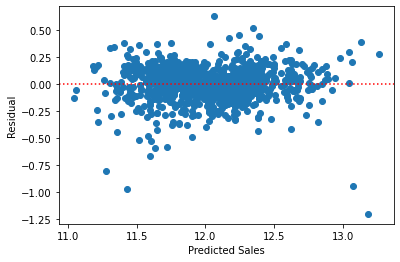

In [146]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_train , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Sales")
plt.ylabel("Residual")
plt.show()







So here variance is also constant and showing no trend

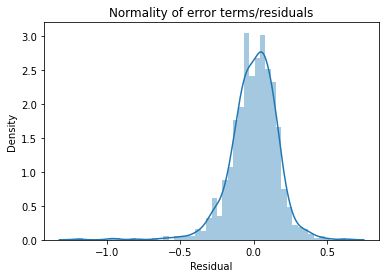

In [147]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

Error terms are also normally distributed

So assumptions are getting fullfilled

### Building Ridge Regression Model

In [148]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [149]:
ridge = Ridge()


In [150]:
# cross validation

from sklearn.model_selection import GridSearchCV


folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
# Getting the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 9.0}


In [152]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.12540142e-02 -7.54917709e-05  3.96538876e-02  6.38287944e-02
  5.05616124e-02  5.29083057e-03  2.81709456e-02 -4.51636661e-03
 -8.00422703e-03  4.24903894e-02 -2.15535277e-03 -1.40663249e-02
 -7.59732039e-03  1.44978540e-01  1.73080925e-02  1.14193020e-02
  1.18695262e-02 -2.23568417e-03  1.21280664e-03  1.10239088e-02
  4.08592821e-02 -9.96879835e-03  1.08227444e-02  1.19567785e-03
  4.41861032e-03  2.54555696e-03  8.50835820e-03 -1.21255623e-02
 -6.28607216e-03  2.90974465e-03  7.45472462e-03 -5.78746571e-02
 -2.04347167e-02 -5.33226868e-03  5.61078567e-02  3.83670426e-02
  5.72377579e-02  2.21817050e-02  1.12135420e-02 -6.09367494e-02
  7.38725380e-03  2.19932091e-02 -4.10203396e-02 -1.15335293e-02
  8.59229527e-04  2.23466272e-03 -8.06339877e-03  9.12707535e-03
  3.60259651e-02 -1.34698499e-02  9.20030764e-02 -9.13983193e-02
 -3.10032837e-02 -7.85438139e-02 -1.72499961e-02 -3.71998205e-02
 -1.89817836e-02  1.56680846e-02 -3.02197370e-02  9.71152965e-02
  7.84374719e-02 -6.05233

In [153]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

print('--------------------------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

print('--------------------------------------------------------------------------------')


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9213796573802749
0.8886433849211973
--------------------------------------------------------------------------------
12.61779321282887
8.025204869587759
--------------------------------------------------------------------------------
0.012358269552231998
0.018322385547004015


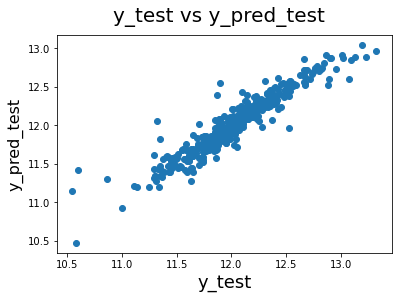

In [154]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label
plt.show()

## Making Lasso Regression Model

In [155]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [156]:
# Getting the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [157]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [158]:
lasso.coef_

array([-0.01811539,  0.        ,  0.03939792,  0.07046138,  0.05264997,
        0.        ,  0.03001867, -0.00309757, -0.00185444,  0.02418366,
        0.00173385, -0.0156063 , -0.00505463,  0.15303486,  0.01984666,
        0.00529408,  0.00745355, -0.00522974, -0.        ,  0.02008367,
        0.03242069, -0.00264316,  0.01140846,  0.        ,  0.00215582,
        0.00230316,  0.0081826 , -0.01285541, -0.00769721,  0.0014639 ,
        0.00737543, -0.08284143, -0.02156654,  0.        ,  0.        ,
        0.        ,  0.02694845, -0.        ,  0.        , -0.01385158,
        0.00186903,  0.00389407, -0.01024372, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.01613016,  0.        ,
        0.08917029, -0.07137517, -0.00450671, -0.06435679, -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.11619109,
        0.08856228, -0.04405951,  0.        , -0.01901696, -0.        ,
        0.08269803,  0.06452398, -0.        ,  0.        ,  0.  

In [159]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

print('----------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

print('----------------------------------------------------------------')


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9115085873027228
0.8874467812275012
----------------------------------------------------------------
14.202003060785533
8.11144123536469
----------------------------------------------------------------
0.013909895260318836
0.018519272226860024


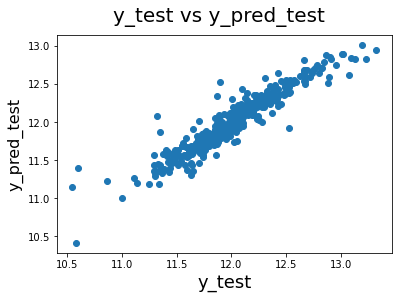

In [160]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label
plt.show()

In [161]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.835033          0.921380          0.911509
1   R2 Score (Test)           0.804991          0.888643          0.887447
2       RSS (Train)          26.475608         12.617793         14.202003
3        RSS (Test)          14.053844          8.025205          8.111441
4       MSE (Train)           0.161031          0.111168          0.117940
5        MSE (Test)           0.179127          0.135360          0.136086

So we can conclude that Ridge regression is doing far better than Linear Regression by taking all the variable into account and reducing their coefficients.But Lasso is adding little bias to the train model which resulted into slightly less value of R2 in train but difference between R2 of train and test got minimized in case of Lasso and Lasso Model showed better results on test in overall.

# Additional Q/A based coding

## Q-1

In [162]:
#  Doubling the optimal alpha value of ridge and Lasso

In [163]:
#Fitting Ridge model for alpha = 18(double) and printing coefficients which have been penalised
alpha = 18.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.95909108e-02  1.01780469e-03  3.81899831e-02  6.88859710e-02
  4.98981357e-02  7.00846375e-03  2.80200017e-02 -4.04643410e-03
 -7.04694595e-03  3.60578784e-02  1.54684815e-02 -3.16439677e-03
 -5.03570198e-03  1.23738767e-01  1.81009239e-02  1.33003631e-02
  1.39177325e-02 -3.02293994e-03  3.42857566e-03  1.53004135e-02
  4.00293950e-02 -8.60724359e-03  1.06193577e-02  8.01821762e-04
  3.81652541e-03  2.52297398e-03  8.18524016e-03 -1.28825286e-02
 -6.93103667e-03  2.69590695e-03  7.71785163e-03 -5.84055355e-02
 -2.14317057e-02 -4.61452935e-03  3.98693055e-02  2.08296221e-02
  3.93608155e-02 -1.33855263e-03  9.28383242e-03 -4.16516740e-02
  4.90199573e-03  2.16903856e-02 -3.01865529e-02 -6.23679219e-03
  1.06209998e-03  1.92078996e-03 -2.28501090e-03  1.16798678e-02
  3.00928882e-02 -1.46161377e-02  7.40107033e-02 -7.52833404e-02
 -3.07970480e-02 -5.73718215e-02 -7.52795683e-03 -2.54156945e-02
 -1.21019923e-02  8.98881249e-03 -2.43882651e-02  7.49691095e-02
  6.24473585e-02 -4.54935

In [164]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

print('--------------------------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

print('--------------------------------------------------------------------------------')


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9167820670064174
0.88840678928275
--------------------------------------------------------------------------------
13.355661335526065
8.042255751283893
--------------------------------------------------------------------------------
0.013080961151347763
0.01836131450064816


In [165]:
ridge_coeff = pd.DataFrame()
ridge_coeff["Columns"] = X_train.columns
ridge_coeff['Coefficient Estimate'] = abs(pd.Series(ridge.coef_))

ridge_coeff
ridge_coeff.sort_values(by = ('Coefficient Estimate'), ascending=False)

Columns  Coefficient Estimate
13                            GrLivArea              0.123739
51                 Neighborhood_Edwards              0.075283
59                 Neighborhood_NoRidge              0.074969
50                 Neighborhood_Crawfor              0.074011
3                           OverallQual              0.068886
60                 Neighborhood_NridgHt              0.062447
31              Total_Years_Since_Built              0.058406
53                  Neighborhood_IDOTRR              0.057372
126                         BsmtQual_Gd              0.050919
66                 Neighborhood_StoneBr              0.050380
65                 Neighborhood_Somerst              0.050005
4                           OverallCond              0.049898
83                  Exterior1st_BrkFace              0.046910
61                 Neighborhood_OldTown              0.045494
128                         BsmtQual_TA              0.043358
39                         LotShape_IR3              0.041652
20                           GarageCars              0.040029
34                          MSZoning_FV              0.039869
36                          MSZoning_RL              0.039361
2                               LotArea              0.038190
129                     BsmtExposure_Gd              0.037635
63                  Neighborhood_Sawyer              0.037545
175                SaleCondition_Normal              0.036532
9                           TotalBsmtSF              0.036058
160                          Fence_GdWo              0.033461
143                      KitchenQual_Fa              0.033197
144                      KitchenQual_Gd              0.033170
145                      KitchenQual_TA              0.032130
52                 Neighborhood_Gilbert              0.030797
154                  GarageType_CarPort              0.030701
42                        LotConfig_FR2              0.030187
48                 Neighborhood_ClearCr              0.030093
137                    BsmtFinType1_Rec              0.028382
6                            BsmtFinSF1              0.028020
166                      SaleType_ConLD              0.026694
131                     BsmtExposure_No              0.026332
121                    Foundation_PConc              0.025847
55                 Neighborhood_Mitchel              0.025416
58                  Neighborhood_NWAmes              0.024388
125                         BsmtQual_Fa              0.023404
149                      FireplaceQu_Po              0.023316
41                    LotConfig_CulDSac              0.021690
32   Remodelled_Total_Years_Since_Built              0.021432
148            FireplaceQu_No Fireplace              0.021018
35                          MSZoning_RH              0.020830
0                            MSSubClass              0.019591
142                        HeatingQC_TA              0.018991
97                  Exterior2nd_BrkFace              0.018952
151                   GarageType_Attchd              0.018720
101                 Exterior2nd_ImStucc              0.018566
64                 Neighborhood_SawyerW              0.018265
135                    BsmtFinType1_LwQ              0.018201
111                     MasVnrType_None              0.018129
14                         BsmtFullBath              0.018101
159                    GarageFinish_Unf              0.018067
109                 Exterior2nd_Wd Shng              0.018023
169                        SaleType_New              0.017821
176               SaleCondition_Partial              0.017821
102                 Exterior2nd_MetalSd              0.016508
152                  GarageType_Basment              0.016239
122                     Foundation_Slab              0.016065
10                             1stFlrSF              0.015468
116                        ExterCond_Fa              0.015338
19                           Fireplaces              0.015300
82

In [166]:
# Fitting Lasso model for alpha = 0.002(doubled) and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_



array([-0.01492459,  0.        ,  0.03804087,  0.08152077,  0.05031934,
        0.        ,  0.03233251, -0.00084333, -0.        ,  0.01733366,
        0.02674847, -0.        , -0.00116213,  0.13066089,  0.02056647,
        0.00422396,  0.00796518, -0.00581577, -0.        ,  0.0233565 ,
        0.0310102 , -0.        ,  0.00968652,  0.        ,  0.        ,
        0.00176127,  0.00697074, -0.01370939, -0.00687154,  0.00015567,
        0.00610572, -0.09140336, -0.02074581,  0.        ,  0.        ,
        0.        ,  0.01826022, -0.01418974,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.05791649, -0.04523577, -0.        , -0.00261272,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.07063228,
        0.05530069, -0.00719964,  0.        , -0.        , -0.        ,
        0.040661  ,  0.        , -0.        ,  0.        ,  0.  

In [167]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

print('----------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

print('----------------------------------------------------------------')


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8999626774947134
0.8816960834359168
----------------------------------------------------------------
16.055008244394145
8.525880268805968
----------------------------------------------------------------
0.015724787702638732
0.019465480065767052


In [168]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = abs(pd.Series(lasso.coef_))

lasso_coeff
lasso_coeff.sort_values(by = ('Coefficient Estimate'), ascending=False)

Columns  Coefficient Estimate
13                            GrLivArea              0.130661
31              Total_Years_Since_Built              0.091403
3                           OverallQual              0.081521
59                 Neighborhood_NoRidge              0.070632
50                 Neighborhood_Crawfor              0.057916
60                 Neighborhood_NridgHt              0.055301
4                           OverallCond              0.050319
51                 Neighborhood_Edwards              0.045236
65                 Neighborhood_Somerst              0.040661
2                               LotArea              0.038041
129                     BsmtExposure_Gd              0.033714
6                            BsmtFinSF1              0.032333
20                           GarageCars              0.031010
126                         BsmtQual_Gd              0.028940
10                             1stFlrSF              0.026748
19                           Fireplaces              0.023356
32   Remodelled_Total_Years_Since_Built              0.020746
14                         BsmtFullBath              0.020566
131                     BsmtExposure_No              0.019777
83                  Exterior1st_BrkFace              0.019051
36                          MSZoning_RL              0.018260
9                           TotalBsmtSF              0.017334
0                            MSSubClass              0.014925
128                         BsmtQual_TA              0.014756
37                          MSZoning_RM              0.014190
27                             PoolArea              0.013709
115                        ExterQual_TA              0.012630
159                    GarageFinish_Unf              0.012494
142                        HeatingQC_TA              0.012143
175                SaleCondition_Normal              0.010505
22                           WoodDeckSF              0.009687
121                    Foundation_PConc              0.008119
16                             HalfBath              0.007965
61                 Neighborhood_OldTown              0.007200
26                          ScreenPorch              0.006971
28                              MiscVal              0.006872
137                    BsmtFinType1_Rec              0.006459
30                               YrSold              0.006106
17                         BedroomAbvGr              0.005816
15                             FullBath              0.004224
145                      KitchenQual_TA              0.002778
53                  Neighborhood_IDOTRR              0.002613
102                 Exterior2nd_MetalSd              0.001932
25                            3SsnPorch              0.001761
12                         LowQualFinSF              0.001162
7                            BsmtFinSF2              0.000843
29                               MoSold              0.000156
172               SaleCondition_AdjLand              0.000000
125                         BsmtQual_Fa              0.000000
173                SaleCondition_Alloca              0.000000
127                BsmtQual_No Basement              0.000000
161                         Fence_MnPrv              0.000000
123                    Foundation_Stone              0.000000
171                         SaleType_WD              0.000000
130                     BsmtExposure_Mn              0.000000
170                        SaleType_Oth              0.000000
132            BsmtExposure_No Basement              0.000000
133                    BsmtFinType1_BLQ              0.000000
124                     Foundation_Wood              0.000000
174                SaleCondition_Family              0.000000
122                     Foundation_Slab              0.000000
135                    BsmtFinType1_LwQ              0.000000
120                   Foundation_CBlock              0.000000
119                        ExterCond_TA              0.000000
11

## Q-3

In [169]:
# Fitting Lasso model for alpha = 0.002(doubled) and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_





array([-0.01811539,  0.        ,  0.03939792,  0.07046138,  0.05264997,
        0.        ,  0.03001867, -0.00309757, -0.00185444,  0.02418366,
        0.00173385, -0.0156063 , -0.00505463,  0.15303486,  0.01984666,
        0.00529408,  0.00745355, -0.00522974, -0.        ,  0.02008367,
        0.03242069, -0.00264316,  0.01140846,  0.        ,  0.00215582,
        0.00230316,  0.0081826 , -0.01285541, -0.00769721,  0.0014639 ,
        0.00737543, -0.08284143, -0.02156654,  0.        ,  0.        ,
        0.        ,  0.02694845, -0.        ,  0.        , -0.01385158,
        0.00186903,  0.00389407, -0.01024372, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.01613016,  0.        ,
        0.08917029, -0.07137517, -0.00450671, -0.06435679, -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.11619109,
        0.08856228, -0.04405951,  0.        , -0.01901696, -0.        ,
        0.08269803,  0.06452398, -0.        ,  0.        ,  0.  

In [170]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

print('----------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

print('----------------------------------------------------------------')


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)



0.9115085873027228
0.8874467812275012
----------------------------------------------------------------
14.202003060785533
8.11144123536469
----------------------------------------------------------------
0.013909895260318836
0.018519272226860024


In [171]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = abs(pd.Series(lasso.coef_))

lasso_coeff
lasso_coeff.sort_values(by = ('Coefficient Estimate'), ascending=False)

Columns  Coefficient Estimate
13                            GrLivArea              0.153035
59                 Neighborhood_NoRidge              0.116191
50                 Neighborhood_Crawfor              0.089170
60                 Neighborhood_NridgHt              0.088562
31              Total_Years_Since_Built              0.082841
65                 Neighborhood_Somerst              0.082698
51                 Neighborhood_Edwards              0.071375
3                           OverallQual              0.070461
66                 Neighborhood_StoneBr              0.064524
53                  Neighborhood_IDOTRR              0.064357
83                  Exterior1st_BrkFace              0.055312
4                           OverallCond              0.052650
126                         BsmtQual_Gd              0.047598
61                 Neighborhood_OldTown              0.044060
129                     BsmtExposure_Gd              0.042363
2                               LotArea              0.039398
20                           GarageCars              0.032421
128                         BsmtQual_TA              0.031603
6                            BsmtFinSF1              0.030019
36                          MSZoning_RL              0.026948
175                SaleCondition_Normal              0.026162
9                           TotalBsmtSF              0.024184
131                     BsmtExposure_No              0.022405
32   Remodelled_Total_Years_Since_Built              0.021567
19                           Fireplaces              0.020084
14                         BsmtFullBath              0.019847
137                    BsmtFinType1_Rec              0.019810
63                  Neighborhood_Sawyer              0.019017
0                            MSSubClass              0.018115
160                          Fence_GdWo              0.017719
48                 Neighborhood_ClearCr              0.016130
159                    GarageFinish_Unf              0.015777
11                             2ndFlrSF              0.015606
145                      KitchenQual_TA              0.014908
39                         LotShape_IR3              0.013852
144                      KitchenQual_Gd              0.013734
115                        ExterQual_TA              0.013114
27                             PoolArea              0.012855
142                        HeatingQC_TA              0.012113
22                           WoodDeckSF              0.011408
121                    Foundation_PConc              0.011076
102                 Exterior2nd_MetalSd              0.010712
169                        SaleType_New              0.010708
42                        LotConfig_FR2              0.010244
26                          ScreenPorch              0.008183
73                    HouseStyle_2Story              0.007714
28                              MiscVal              0.007697
16                             HalfBath              0.007454
30                               YrSold              0.007375
112                    MasVnrType_Stone              0.006399
151                   GarageType_Attchd              0.005319
15                             FullBath              0.005294
17                         BedroomAbvGr              0.005230
12                         LowQualFinSF              0.005055
158                    GarageFinish_RFn              0.004698
52                 Neighborhood_Gilbert              0.004507
93                  Exterior1st_Wd Sdng              0.004311
161                         Fence_MnPrv              0.003983
41                    LotConfig_CulDSac              0.003894
7                            BsmtFinSF2              0.003098
21                           GarageArea              0.002643
25                            3SsnPorch              0.002303
176               SaleCondition_Partial              0.002217
24                        EnclosedPorch              0.002156
40

In [172]:
# So here top-5 variables are:
lasso_coeff.sort_values(by = ('Coefficient Estimate'), ascending=False)['Columns'][:6].values

array(['GrLivArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Total_Years_Since_Built',
       'Neighborhood_Somerst'], dtype=object)

In [173]:


alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train.drop(['GrLivArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Total_Years_Since_Built',
       'Neighborhood_Somerst'],axis=1), y_train) 

lasso.coef_







array([-0.01499158,  0.00078629,  0.03919948,  0.09262422,  0.03838839,
        0.00810798,  0.03059082, -0.00302409, -0.00451004,  0.03148902,
        0.09622556,  0.06005541,  0.00325277,  0.01762834,  0.02353677,
        0.02522977, -0.        ,  0.01677712,  0.02254844,  0.03960146,
       -0.00355631,  0.00935813,  0.00062973,  0.        ,  0.00145678,
        0.0063071 , -0.0135894 , -0.00900198,  0.00273205,  0.00775978,
       -0.03456018, -0.00301235,  0.07930308,  0.        ,  0.03697474,
       -0.        ,  0.        , -0.02508734, -0.        ,  0.0127955 ,
       -0.01600015, -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.00412357, -0.01396693, -0.08605964, -0.01777963,
       -0.07934956, -0.        , -0.        , -0.01435065,  0.        ,
       -0.01782615, -0.07202102, -0.        , -0.02732961, -0.0104123 ,
        0.01833463, -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.00544445,  0.        , -0.  

In [174]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train.drop(['GrLivArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Total_Years_Since_Built',
       'Neighborhood_Somerst'],axis=1))
y_pred_test = lasso.predict(X_test.drop(['GrLivArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Total_Years_Since_Built',
       'Neighborhood_Somerst'],axis=1))

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

print('----------------------------------------------------------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

print('----------------------------------------------------------------')


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)





0.8980908140414433
0.8826652770385747
----------------------------------------------------------------
16.355423953471544
8.456032804296386
----------------------------------------------------------------
0.016019024440226782
0.019306010968713212


In [175]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.drop(['GrLivArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Total_Years_Since_Built',
       'Neighborhood_Somerst'],axis=1).columns
lasso_coeff['Coefficient Estimate'] = abs(pd.Series(lasso.coef_))

lasso_coeff
lasso_coeff.sort_values(by = ('Coefficient Estimate'), ascending=False)

Columns  Coefficient Estimate
10                             1stFlrSF              0.096226
3                           OverallQual              0.092624
48                 Neighborhood_Edwards              0.086060
50                  Neighborhood_IDOTRR              0.079350
32                          MSZoning_FV              0.079303
122                         BsmtQual_TA              0.078412
56                 Neighborhood_OldTown              0.072021
120                         BsmtQual_Gd              0.064390
11                             2ndFlrSF              0.060055
77                  Exterior1st_BrkFace              0.048302
119                         BsmtQual_Fa              0.041946
19                           GarageCars              0.039601
2                               LotArea              0.039199
115                    Foundation_PConc              0.038773
4                           OverallCond              0.038388
109                        ExterQual_TA              0.037438
34                          MSZoning_RL              0.036975
123                     BsmtExposure_Gd              0.036668
30   Remodelled_Total_Years_Since_Built              0.034560
9                           TotalBsmtSF              0.031489
6                            BsmtFinSF1              0.030591
58                  Neighborhood_Sawyer              0.027330
15                             HalfBath              0.025230
37                         LotShape_IR3              0.025087
14                             FullBath              0.023537
169                SaleCondition_Normal              0.023393
18                           Fireplaces              0.022548
139                      KitchenQual_TA              0.021587
125                     BsmtExposure_No              0.021204
163                        SaleType_New              0.021199
153                    GarageFinish_Unf              0.020972
87                  Exterior1st_Wd Sdng              0.020365
131                    BsmtFinType1_Rec              0.019159
136                        HeatingQC_TA              0.018367
60                 Neighborhood_StoneBr              0.018335
55                  Neighborhood_NWAmes              0.017826
49                 Neighborhood_Gilbert              0.017780
13                         BsmtFullBath              0.017628
17                         TotRmsAbvGrd              0.016777
40                        LotConfig_FR2              0.016000
154                          Fence_GdWo              0.015964
0                            MSSubClass              0.014992
53                   Neighborhood_NAmes              0.014351
96                  Exterior2nd_MetalSd              0.014020
47                 Neighborhood_CollgCr              0.013967
86                  Exterior1st_VinylSd              0.013848
26                             PoolArea              0.013589
128                    BsmtFinType1_GLQ              0.013415
138                      KitchenQual_Gd              0.013252
39                    LotConfig_CulDSac              0.012796
147                  GarageType_BuiltIn              0.011120
59                 Neighborhood_SawyerW              0.010412
70                      RoofStyle_Gable              0.009631
21                           WoodDeckSF              0.009358
27                              MiscVal              0.009002
113                        ExterCond_TA              0.008895
5                            MasVnrArea              0.008108
29                               YrSold              0.007760
134                        HeatingQC_Gd              0.007759
137                      KitchenQual_Fa              0.007277
25                          ScreenPorch              0.006307
170               SaleCondition_Partial              0.005810
67                    HouseStyle_2Story              0.005444
145                   GarageType_Attchd              0.005392
8 

In [176]:
lasso_coeff.sort_values(by = ('Coefficient Estimate'), ascending=False)['Columns'][:6].values

array(['1stFlrSF', 'OverallQual', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'MSZoning_FV', 'BsmtQual_TA'], dtype=object)